1. Are there geographic differences in robot usage?
  - Consider all descriptive features of a mission, including when and how frequently it occurred.
  - If applicable, comment on how trends in these features might impact design decisions for the hardware, battery, or navigation algorithms of robots sold in different regions.
  
  
2. Calculate the time between consecutive missions for each robot ("inter-mission interval" or "IMI"). Describe any interesting relationships between IMI and other features of robot behavior.


3. **BONUS**: We are aware that data loss exists among the mission records, but are unsure of the cause. Quantify the extent of the loss, differentiating between discrete catastrophic events and random mission loss for individual robots. Investigate whether this loss is uniform or whether it may be impacting other analyses.


    - For this we can group by each individual robot, then calculate the missing numbers between mission IDs for a crude quantity.

# Loading Data + Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
geo_df = pd.read_csv("/Users/alexanderxu/Desktop/BA-interview-homework/data/geo_data.csv")
mission_df = pd.read_csv("/Users/alexanderxu/Desktop/BA-interview-homework/data/mission_data.csv")

In [3]:
#function to return null

def nans(df): 
    return df[df.isnull().any(axis=1)]

# Geo_Df
- There appears to be two null entries for country_cd

In [4]:
print(geo_df.describe())
print()
print(geo_df.isnull().sum())

       country_cd        timezone           robotid
count        9998           10000             10000
unique         84             122             10000
top            IL  Asia/Jerusalem  P97QTQTX37EO7JWH
freq         6065            6108                 1

country_cd    2
timezone      0
robotid       0
dtype: int64


In [5]:
print(nans(geo_df))
print()

     country_cd         timezone           robotid
6091        NaN     Europe/Vaduz  QMJXZLREE88GULA1
6363        NaN  Africa/Windhoek  Z9JJM7JRIGJYLER2



We check if the robotid shows up twice or more in order to fill in missing info

In [6]:
#check for matching robotids
print(geo_df.loc[geo_df['robotid'] == 'QMJXZLREE88GULA1'])
print()
print(geo_df.loc[geo_df['robotid'] == 'Z9JJM7JRIGJYLER2'])

     country_cd      timezone           robotid
6091        NaN  Europe/Vaduz  QMJXZLREE88GULA1

     country_cd         timezone           robotid
6363        NaN  Africa/Windhoek  Z9JJM7JRIGJYLER2


In [7]:
geo_df.head(1000)

,country_cd,timezone,robotid
0,SE,Europe/Stockholm,T29NF13ZIYISNF79
1,JP,Asia/Tokyo,9S12V26O6G426OYR
2,IL,Asia/Jerusalem,QI6X3P9JKNILKKU1
3,IL,Asia/Jerusalem,7OMKNWMWA4XWC911
4,IL,Asia/Jerusalem,YO63CL0ZFK83SYCZ
...,...,...,...
995,IL,Asia/Jerusalem,1YI12LIV6FS7ZR15
996,IL,Asia/Jerusalem,HHSTZ02G8T2C9MUZ
997,IL,Asia/Jerusalem,KROE5C78KFK7M3SM
998,NL,Europe/Amsterdam,IY8AC5975769PM4L


# Mission_Df

In [8]:
print(mission_df.describe())
print()
print(mission_df.isnull().sum())

               nmssn           runm          chrgm         pausem
count  367679.000000  367679.000000  367679.000000  367679.000000
mean       73.258984      48.906383       5.152772       6.231351
std        35.749076      29.819507       8.364238       8.202553
min         1.000000       0.000000       0.000000       0.000000
25%        47.000000      27.000000       0.000000       0.000000
50%        71.000000      47.000000       0.000000       1.000000
75%        95.000000      70.000000      11.000000      12.000000
max       248.000000     144.000000      30.000000      40.000000

robotid     0
datetime    0
nmssn       0
runm        0
chrgm       0
pausem      0
outcome     0
dtype: int64


In [9]:
mission_df.head(10)

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome
0,000NG2FMLJBT9ANZ,2017-10-01 16:17:22,40,3,1,2,stuck
1,000NG2FMLJBT9ANZ,2017-10-03 14:25:56,41,83,0,13,ok
2,000NG2FMLJBT9ANZ,2017-10-04 12:32:51,42,66,13,12,ok
3,000NG2FMLJBT9ANZ,2017-10-26 02:12:55,45,72,24,0,cncl
4,000NG2FMLJBT9ANZ,2017-10-27 07:17:39,46,61,9,0,cncl
5,000Y9NBMJ77LQ7S7,2016-11-28 05:41:25,55,61,0,13,ok
6,000Y9NBMJ77LQ7S7,2016-12-20 10:06:42,56,31,0,6,cncl
7,000Y9NBMJ77LQ7S7,2017-02-18 03:16:40,57,11,0,2,cncl
8,000Y9NBMJ77LQ7S7,2017-03-08 10:49:36,58,78,0,0,ok
9,000Y9NBMJ77LQ7S7,2017-03-19 10:21:15,59,99,0,0,cncl


# Loading Data + Data Cleaning (Takeaway)

- Two Missing Country_CD for geo_df.
    - Delete entries
        or
    - Make predictor model to fill in entry

# Question_1

Are there geographic differences in robot usage?


Consider all descriptive features of a mission, including when and how frequently it occurred.


If applicable, comment on how trends in these features might impact design decisions for the hardware, battery, or navigation algorithms of robots sold in different regions.

# Thoughts:

First we have to populate each robotid by its repective geo (timezone + Country_Cd)

Second we need to define "usage". In this case we will be counting #of missions, #of robots, and #of minutes (Maybe a combined metric?)
 - Result: We used Unique Missions, #of Robots, #min used

Question is basically asking how is the result tied to geography
- Corollary: How does other features affect the results? (After being filtered thru geography)

Possible Conclusions:
- Geography has biased effect on certain robot features, which may result in an adverse outcome
- If True:
    - nmssn: 
             Low = Adverse -> Algorithm needs to do a better job at initial spacial awareness 
             High = Adverse -> Algorithm ML capacities are not learning correctly
    - runm:  
             Low = Adverse -> Behavior/Environmental guidance. Robot is not initialized at a good place
             High = Adverse -> Memory/Function overload that causes functional attrition
    -

In [10]:
#dropping null values
geo_df_drop = geo_df.dropna(how='any',axis=0)
#joining the two dataframes
master_df = pd.merge(mission_df, geo_df_drop)
print(master_df.head(10))
#checking for null
print(master_df.isnull().sum())

            robotid             datetime  nmssn  runm  chrgm  pausem outcome  \
0  000NG2FMLJBT9ANZ  2017-10-01 16:17:22     40     3      1       2   stuck   
1  000NG2FMLJBT9ANZ  2017-10-03 14:25:56     41    83      0      13      ok   
2  000NG2FMLJBT9ANZ  2017-10-04 12:32:51     42    66     13      12      ok   
3  000NG2FMLJBT9ANZ  2017-10-26 02:12:55     45    72     24       0    cncl   
4  000NG2FMLJBT9ANZ  2017-10-27 07:17:39     46    61      9       0    cncl   
5  000Y9NBMJ77LQ7S7  2016-11-28 05:41:25     55    61      0      13      ok   
6  000Y9NBMJ77LQ7S7  2016-12-20 10:06:42     56    31      0       6    cncl   
7  000Y9NBMJ77LQ7S7  2017-02-18 03:16:40     57    11      0       2    cncl   
8  000Y9NBMJ77LQ7S7  2017-03-08 10:49:36     58    78      0       0      ok   
9  000Y9NBMJ77LQ7S7  2017-03-19 10:21:15     59    99      0       0    cncl   

  country_cd        timezone  
0         IL  Asia/Jerusalem  
1         IL  Asia/Jerusalem  
2         IL  Asia/Jerusal

In [11]:
#creating list of unique countries
print(len(set(master_df['country_cd'])))
country_list = list(set(master_df['country_cd']))
print(country_list)

print(len(set(master_df['timezone'])))
time_list = list(set(master_df['timezone']))
print(time_list)

84
['AD', 'ZA', 'GT', 'CA', 'BS', 'DE', 'TR', 'CO', 'PS', 'NZ', 'NO', 'GR', 'AR', 'JM', 'DK', 'HK', 'PH', 'SK', 'TW', 'CR', 'OM', 'MD', 'NL', 'SG', 'AU', 'HR', 'US', 'BM', 'PT', 'ES', 'RO', 'QA', 'SA', 'LT', 'RU', 'AG', 'PR', 'KZ', 'SX', 'FR', 'NC', 'FI', 'MY', 'CH', 'SE', 'KR', 'CN', 'SI', 'BE', 'IL', 'EE', 'ID', 'VE', 'EG', 'MX', 'JP', 'IE', 'HU', 'AZ', 'UY', 'IT', 'GU', 'GB', 'BG', 'LV', 'BR', 'UA', 'PA', 'AT', 'GE', 'BH', 'PL', 'TH', 'BY', 'SR', 'CZ', 'KY', 'KH', 'IN', 'IS', 'CL', 'VN', 'LU', 'AE']
120
['America/Phoenix', 'Atlantic/Bermuda', 'America/Moncton', 'America/Mexico_City', 'Asia/Kuala_Lumpur', 'Asia/Hebron', 'Europe/Samara', 'Australia/Perth', 'America/Regina', 'America/Cayman', 'Europe/Minsk', 'Asia/Riyadh', 'Europe/Istanbul', 'Pacific/Noumea', 'Europe/Zurich', 'Asia/Jerusalem', 'Europe/Brussels', 'Asia/Novosibirsk', 'Asia/Vladivostok', 'Asia/Kolkata', 'America/Paramaribo', 'Europe/Amsterdam', 'America/Los_Angeles', 'Asia/Singapore', 'Europe/Bucharest', 'Asia/Tokyo', 'Am

In [12]:
#creating groups
c_split = []
for x in country_list:
    df = master_df[master_df['country_cd'] == x]
    c_split.append(df)

# Basic Pie Chart By Country

In [13]:
print(master_df['country_cd'].value_counts())

IL    220119
CN     21054
FR     17719
JP     11743
CA     11126
       ...  
PH        13
BH         8
SX         8
AG         8
VE         1
Name: country_cd, Length: 84, dtype: int64


In [14]:
def print_chart(c_split, name, col):
    for x in c_split:
        count_bf = x['outcome'].value_counts().rename_axis('unique_values').reset_index(name='counts')
        fig1, ax1 = plt.subplots()
        ax1.pie(count_bf['counts'], explode= None, labels=count_bf['unique_values'], autopct='%1.1f%%',
            shadow=True, startangle=90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        print("{} is {}".format(name,x[col].iloc[0]))
        print("Counts are:")
        print()
        print(count_bf)
        print()
        print("Sample Size of {}".format(count_bf['counts'].sum()))
        plt.show()

Country is AD
Counts are:

  unique_values  counts
0            ok      36
1          cncl      14

Sample Size of 50


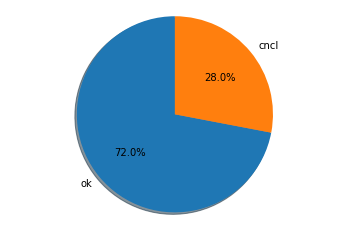

Country is ZA
Counts are:

  unique_values  counts
0            ok      56
1          cncl      12
2         stuck       6
3           bat       2

Sample Size of 76


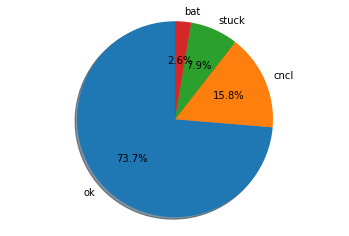

Country is GT
Counts are:

  unique_values  counts
0            ok      83
1          cncl      34
2         stuck       3

Sample Size of 120


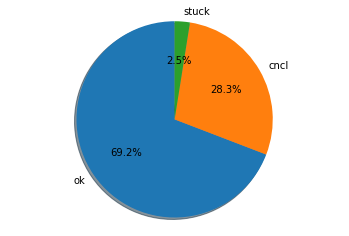

Country is CA
Counts are:

  unique_values  counts
0            ok    6903
1          cncl    3134
2         stuck     856
3           bat     233

Sample Size of 11126


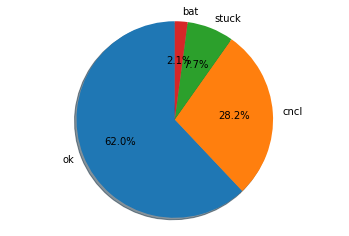

Country is BS
Counts are:

  unique_values  counts
0            ok      59
1          cncl      22
2         stuck       3
3           bat       1

Sample Size of 85


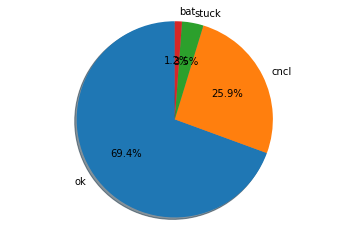

Country is DE
Counts are:

  unique_values  counts
0            ok    5097
1          cncl    2468
2         stuck     542
3           bat     177

Sample Size of 8284


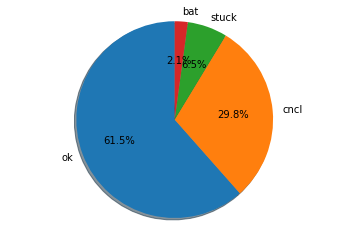

Country is TR
Counts are:

  unique_values  counts
0            ok      83
1          cncl      28
2         stuck      18

Sample Size of 129


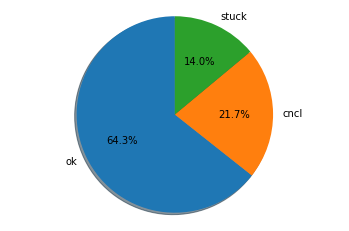

Country is CO
Counts are:

  unique_values  counts
0            ok     150
1          cncl      71
2         stuck       6
3           bat       3

Sample Size of 230


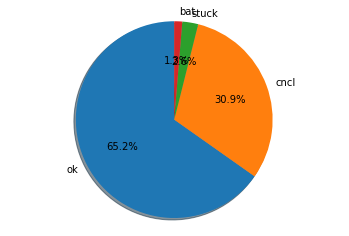

Country is PS
Counts are:

  unique_values  counts
0            ok      24
1          cncl      14
2           bat       3

Sample Size of 41


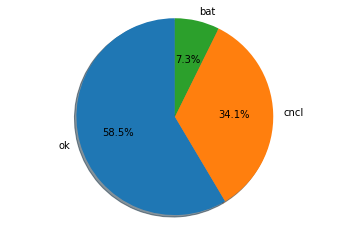

Country is NZ
Counts are:

  unique_values  counts
0            ok     438
1          cncl     196
2         stuck      44
3           bat      12

Sample Size of 690


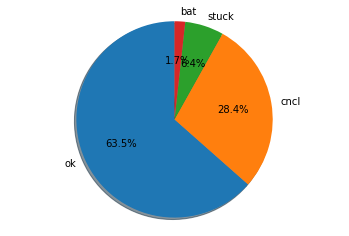

Country is NO
Counts are:

  unique_values  counts
0            ok    2741
1          cncl    1243
2         stuck     388
3           bat     105

Sample Size of 4477


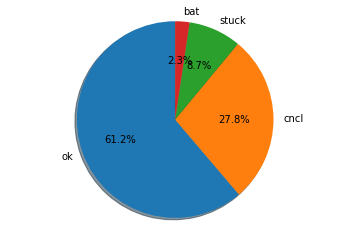

Country is GR
Counts are:

  unique_values  counts
0            ok      56
1          cncl      28
2         stuck      10
3           bat       1

Sample Size of 95


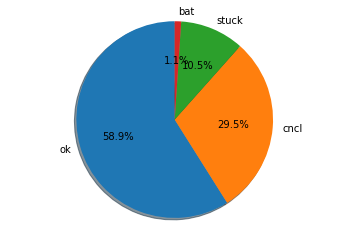

Country is AR
Counts are:

  unique_values  counts
0            ok     318
1          cncl     170
2         stuck      26
3           bat       9

Sample Size of 523


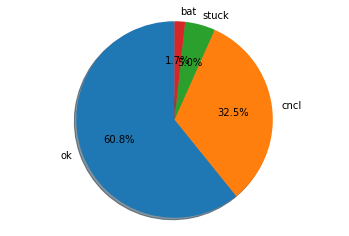

Country is JM
Counts are:

  unique_values  counts
0            ok      22
1          cncl      13
2           bat       3
3         stuck       2

Sample Size of 40


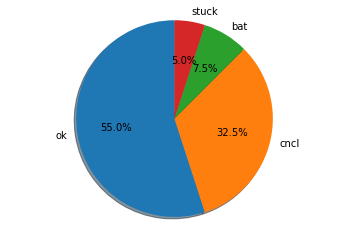

Country is DK
Counts are:

  unique_values  counts
0            ok    1217
1          cncl     556
2         stuck     193
3           bat      48

Sample Size of 2014


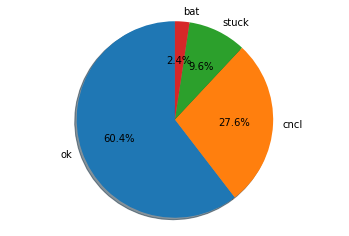

Country is HK
Counts are:

  unique_values  counts
0            ok     398
1          cncl     193
2         stuck      27
3           bat      11

Sample Size of 629


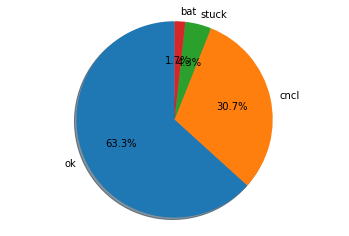

Country is PH
Counts are:

  unique_values  counts
0          cncl       6
1            ok       6
2           bat       1

Sample Size of 13


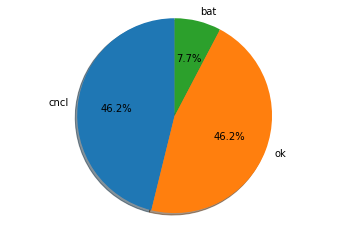

Country is SK
Counts are:

  unique_values  counts
0            ok     976
1          cncl     473
2         stuck     148
3           bat      24

Sample Size of 1621


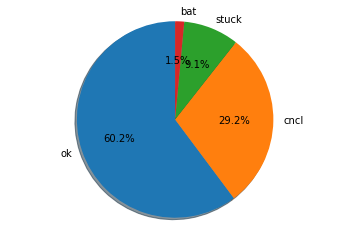

Country is TW
Counts are:

  unique_values  counts
0            ok    2608
1          cncl    1136
2         stuck     322
3           bat      70

Sample Size of 4136


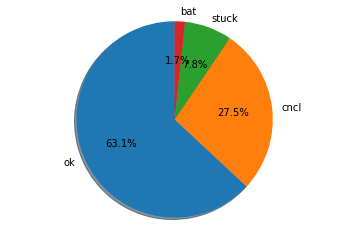

Country is CR
Counts are:

  unique_values  counts
0            ok      59
1          cncl      16
2         stuck      12
3           bat       1

Sample Size of 88


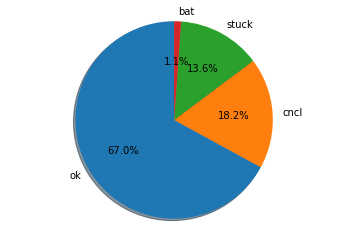

Country is OM
Counts are:

  unique_values  counts
0            ok      23
1          cncl      11
2         stuck       4
3           bat       2

Sample Size of 40


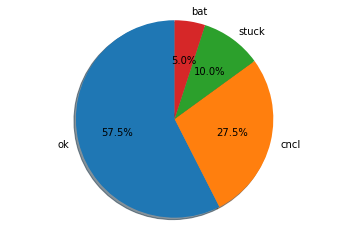

Country is MD
Counts are:

  unique_values  counts
0            ok      18
1          cncl       9
2         stuck       7

Sample Size of 34


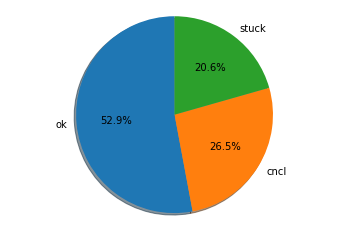

Country is NL
Counts are:

  unique_values  counts
0            ok    1280
1          cncl     567
2         stuck     158
3           bat      40

Sample Size of 2045


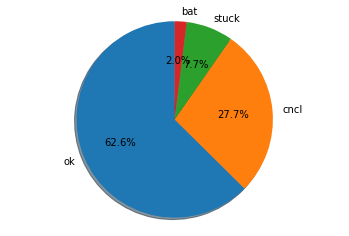

Country is SG
Counts are:

  unique_values  counts
0            ok     624
1          cncl     292
2         stuck      84
3           bat      19

Sample Size of 1019


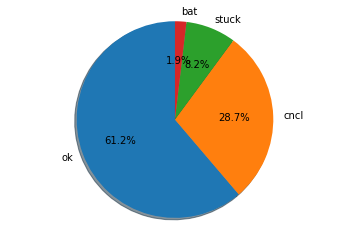

Country is AU
Counts are:

  unique_values  counts
0            ok    1931
1          cncl     891
2         stuck     202
3           bat      76

Sample Size of 3100


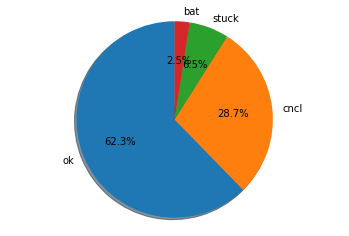

Country is HR
Counts are:

  unique_values  counts
0            ok      96
1          cncl      41
2         stuck      18
3           bat       5

Sample Size of 160


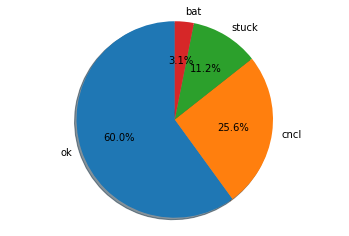

Country is US
Counts are:

  unique_values  counts
0            ok    5182
1          cncl    2310
2         stuck     560
3           bat     169

Sample Size of 8221


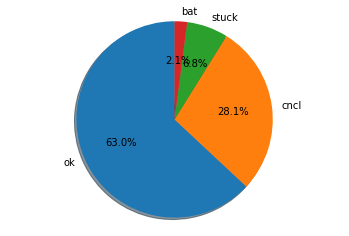

Country is BM
Counts are:

  unique_values  counts
0            ok      47
1          cncl      18
2         stuck       2
3           bat       1

Sample Size of 68


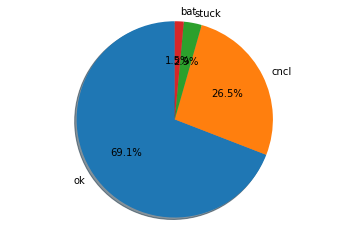

Country is PT
Counts are:

  unique_values  counts
0            ok     432
1          cncl     209
2         stuck      23
3           bat      16

Sample Size of 680


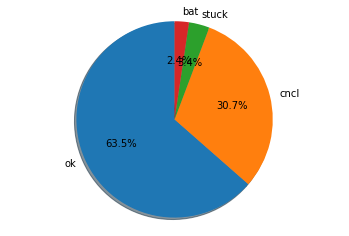

Country is ES
Counts are:

  unique_values  counts
0            ok    1295
1          cncl     584
2         stuck     126
3           bat      46

Sample Size of 2051


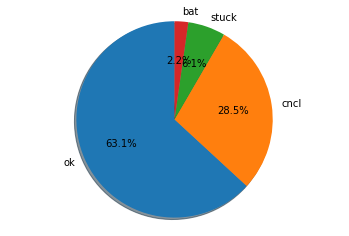

Country is RO
Counts are:

  unique_values  counts
0            ok     276
1          cncl     123
2         stuck      32
3           bat      14

Sample Size of 445


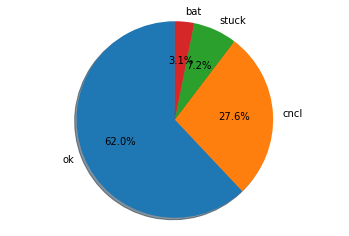

Country is QA
Counts are:

  unique_values  counts
0            ok      43
1          cncl      19
2         stuck      13
3           bat       4

Sample Size of 79


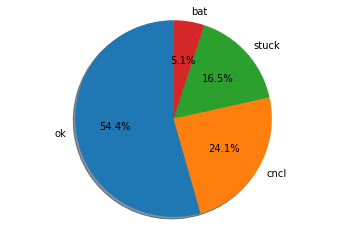

Country is SA
Counts are:

  unique_values  counts
0            ok      66
1          cncl      29
2         stuck      16
3           bat       3

Sample Size of 114


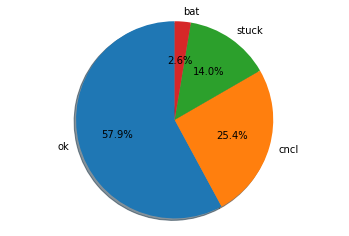

Country is LT
Counts are:

  unique_values  counts
0            ok      37
1          cncl      14
2         stuck       4
3           bat       1

Sample Size of 56


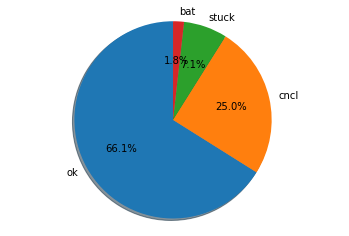

Country is RU
Counts are:

  unique_values  counts
0            ok    2423
1          cncl    1057
2         stuck     368
3           bat      85

Sample Size of 3933


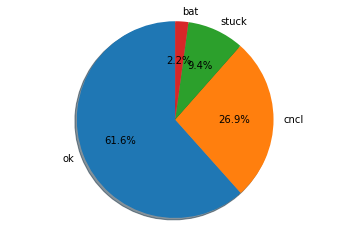

Country is AG
Counts are:

  unique_values  counts
0          cncl       3
1            ok       3
2         stuck       1
3           bat       1

Sample Size of 8


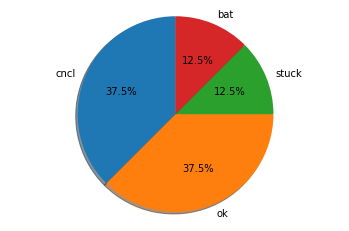

Country is PR
Counts are:

  unique_values  counts
0            ok     159
1          cncl      68
2         stuck      31
3           bat       4

Sample Size of 262


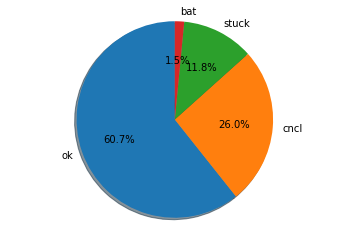

Country is KZ
Counts are:

  unique_values  counts
0            ok      32
1          cncl      11
2         stuck       2

Sample Size of 45


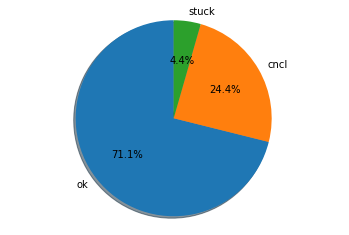

Country is SX
Counts are:

  unique_values  counts
0            ok       7
1          cncl       1

Sample Size of 8


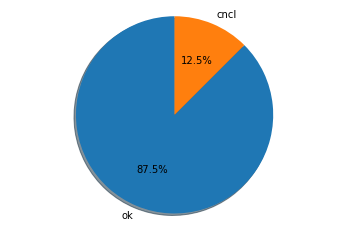

Country is FR
Counts are:

  unique_values  counts
0            ok   11023
1          cncl    4926
2         stuck    1398
3           bat     372

Sample Size of 17719


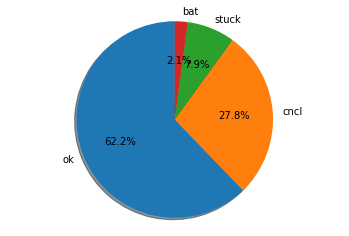

Country is NC
Counts are:

  unique_values  counts
0            ok      33
1          cncl      27
2         stuck       7
3           bat       3

Sample Size of 70


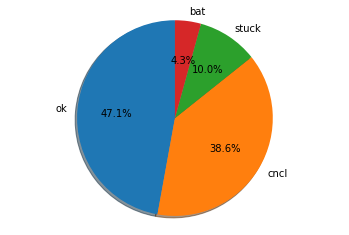

Country is FI
Counts are:

  unique_values  counts
0            ok     224
1          cncl     112
2         stuck      27
3           bat      12

Sample Size of 375


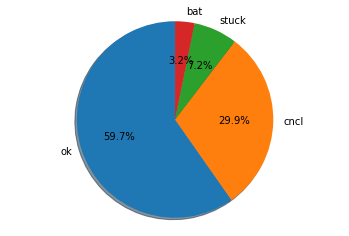

Country is MY
Counts are:

  unique_values  counts
0            ok     220
1          cncl     102
2         stuck      39
3           bat       9

Sample Size of 370


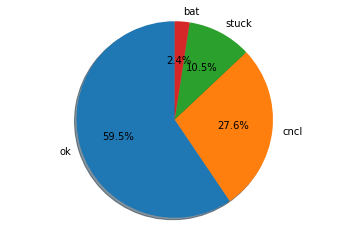

Country is CH
Counts are:

  unique_values  counts
0            ok    1118
1          cncl     481
2         stuck     144
3           bat      40

Sample Size of 1783


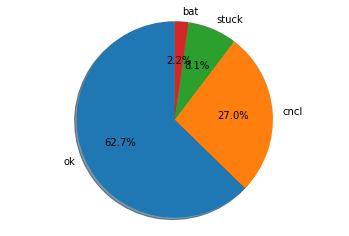

Country is SE
Counts are:

  unique_values  counts
0            ok    1059
1          cncl     497
2         stuck     152
3           bat      32

Sample Size of 1740


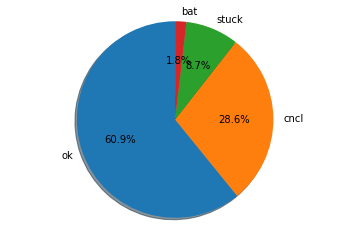

Country is KR
Counts are:

  unique_values  counts
0            ok      80
1          cncl      47
2           bat       5
3         stuck       2

Sample Size of 134


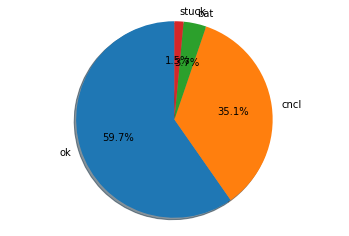

Country is CN
Counts are:

  unique_values  counts
0            ok   13882
1          cncl    5946
2         stuck     780
3           bat     446

Sample Size of 21054


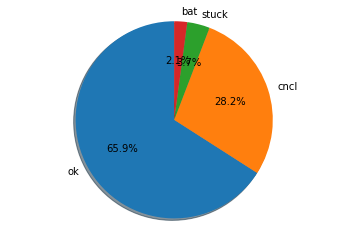

Country is SI
Counts are:

  unique_values  counts
0            ok     440
1          cncl     206
2         stuck      49
3           bat      17

Sample Size of 712


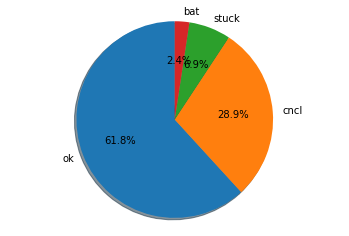

Country is BE
Counts are:

  unique_values  counts
0            ok    3141
1          cncl    1501
2         stuck     365
3           bat     116

Sample Size of 5123


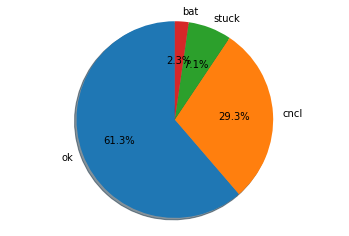

Country is IL
Counts are:

  unique_values  counts
0          cncl  104712
1            ok   97966
2         stuck   11965
3           bat    5476

Sample Size of 220119


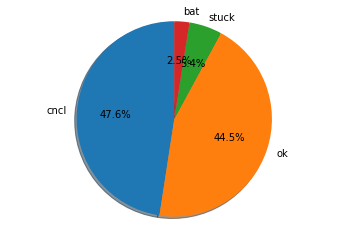

Country is EE
Counts are:

  unique_values  counts
0            ok      30
1          cncl      11
2           bat       1

Sample Size of 42


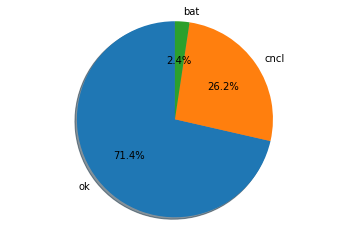

Country is ID
Counts are:

  unique_values  counts
0            ok      74
1          cncl      46
2         stuck       1
3           bat       1

Sample Size of 122


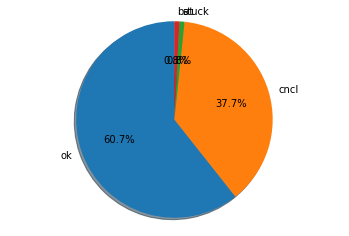

Country is VE
Counts are:

  unique_values  counts
0            ok       1

Sample Size of 1


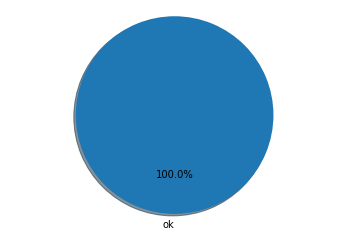

Country is EG
Counts are:

  unique_values  counts
0            ok      23
1          cncl      14
2           bat       1

Sample Size of 38


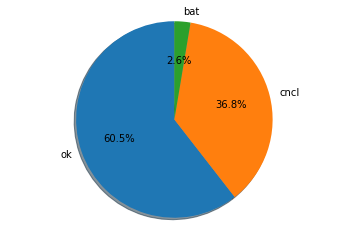

Country is MX
Counts are:

  unique_values  counts
0            ok     433
1          cncl     189
2         stuck      81
3           bat      19

Sample Size of 722


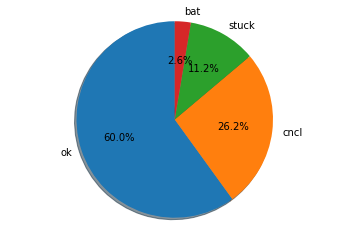

Country is JP
Counts are:

  unique_values  counts
0            ok    7185
1          cncl    3434
2         stuck     860
3           bat     264

Sample Size of 11743


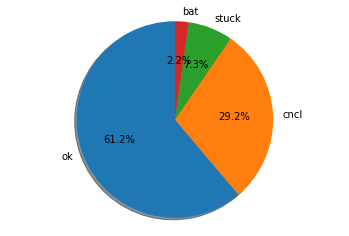

Country is IE
Counts are:

  unique_values  counts
0            ok     124
1          cncl      80
2         stuck       7
3           bat       3

Sample Size of 214


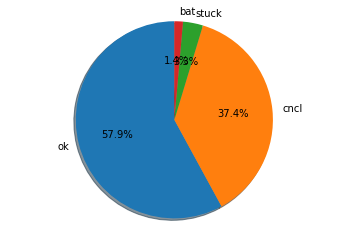

Country is HU
Counts are:

  unique_values  counts
0            ok     162
1          cncl      89
2           bat       7
3         stuck       3

Sample Size of 261


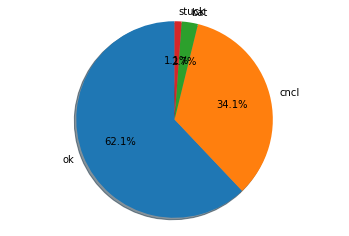

Country is AZ
Counts are:

  unique_values  counts
0            ok      26
1          cncl      14
2         stuck       1
3           bat       1

Sample Size of 42


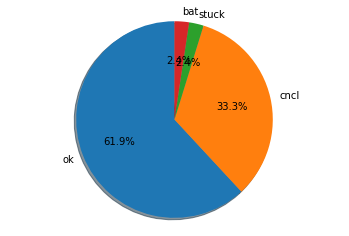

Country is UY
Counts are:

  unique_values  counts
0            ok      97
1          cncl      55
2         stuck      25
3           bat       5

Sample Size of 182


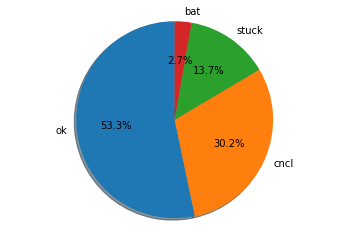

Country is IT
Counts are:

  unique_values  counts
0            ok    2670
1          cncl    1295
2         stuck     291
3           bat      95

Sample Size of 4351


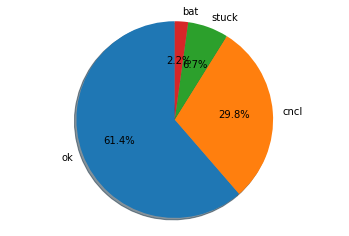

Country is GU
Counts are:

  unique_values  counts
0            ok      30
1          cncl      18
2           bat       2

Sample Size of 50


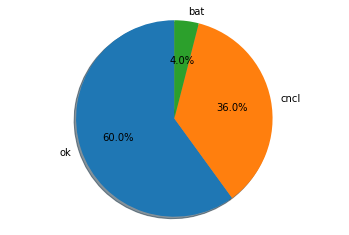

Country is GB
Counts are:

  unique_values  counts
0            ok     752
1          cncl     353
2         stuck     113
3           bat      32

Sample Size of 1250


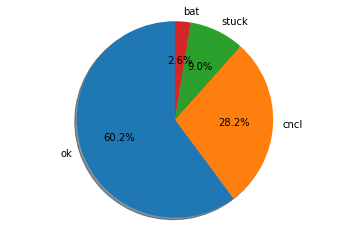

Country is BG
Counts are:

  unique_values  counts
0            ok      91
1          cncl      43
2           bat       4
3         stuck       3

Sample Size of 141


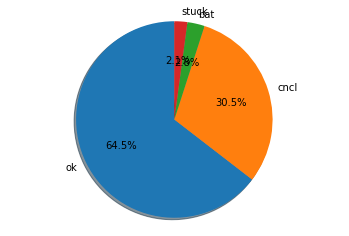

Country is LV
Counts are:

  unique_values  counts
0            ok     278
1          cncl     119
2         stuck      34
3           bat      11

Sample Size of 442


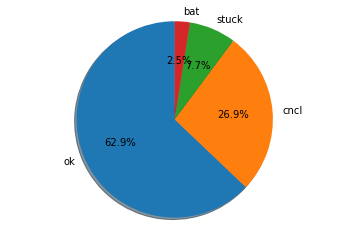

Country is BR
Counts are:

  unique_values  counts
0            ok     857
1          cncl     353
2         stuck     107
3           bat      31

Sample Size of 1348


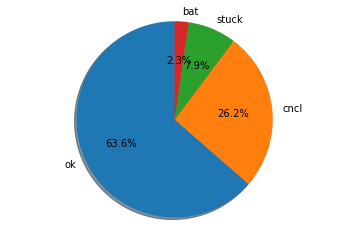

Country is UA
Counts are:

  unique_values  counts
0            ok     395
1          cncl     186
2         stuck      33
3           bat      17

Sample Size of 631


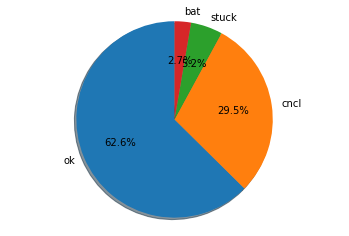

Country is PA
Counts are:

  unique_values  counts
0            ok      20
1         stuck       3
2          cncl       3

Sample Size of 26


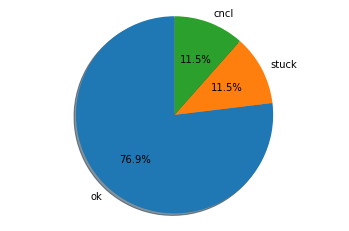

Country is AT
Counts are:

  unique_values  counts
0            ok    6512
1          cncl    3020
2         stuck     775
3           bat     251

Sample Size of 10558


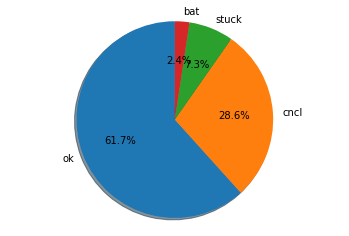

Country is GE
Counts are:

  unique_values  counts
0            ok      57
1          cncl      21
2         stuck       7
3           bat       2

Sample Size of 87


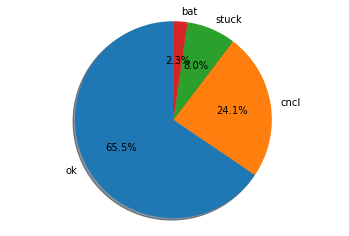

Country is BH
Counts are:

  unique_values  counts
0          cncl       4
1            ok       3
2           bat       1

Sample Size of 8


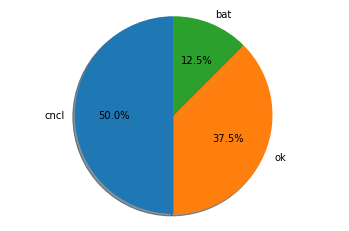

Country is PL
Counts are:

  unique_values  counts
0            ok    2678
1          cncl    1246
2         stuck     353
3           bat     111

Sample Size of 4388


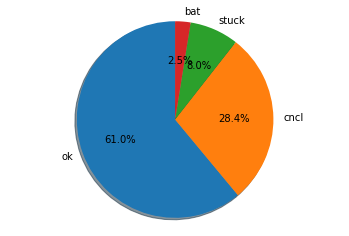

Country is TH
Counts are:

  unique_values  counts
0            ok     553
1          cncl     255
2         stuck      83
3           bat      21

Sample Size of 912


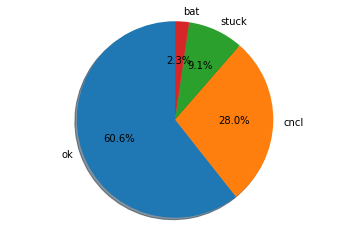

Country is BY
Counts are:

  unique_values  counts
0            ok      99
1          cncl      37
2         stuck      11
3           bat       2

Sample Size of 149


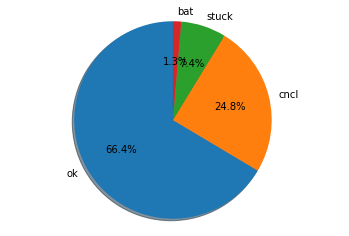

Country is SR
Counts are:

  unique_values  counts
0            ok      50
1          cncl      21
2         stuck       2

Sample Size of 73


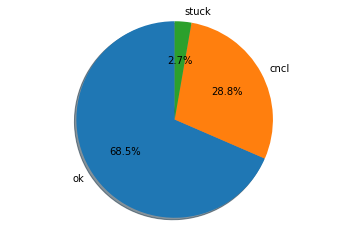

Country is CZ
Counts are:

  unique_values  counts
0            ok    1356
1          cncl     609
2         stuck     171
3           bat      50

Sample Size of 2186


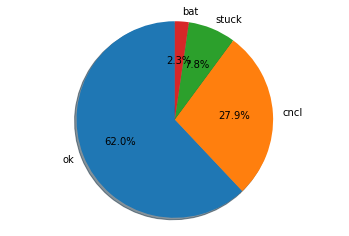

Country is KY
Counts are:

  unique_values  counts
0            ok      31
1          cncl      16
2         stuck       1

Sample Size of 48


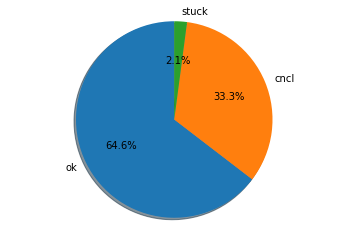

Country is KH
Counts are:

  unique_values  counts
0            ok      56
1          cncl      33
2         stuck       7
3           bat       1

Sample Size of 97


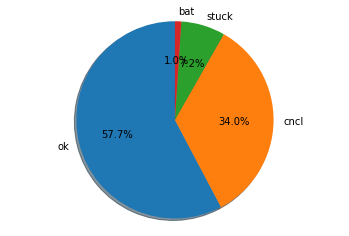

Country is IN
Counts are:

  unique_values  counts
0            ok     274
1          cncl     101
2         stuck      32
3           bat      15

Sample Size of 422


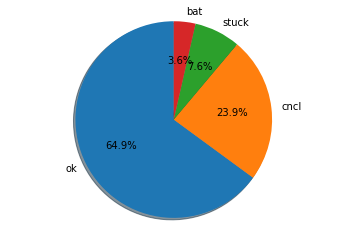

Country is IS
Counts are:

  unique_values  counts
0            ok     158
1          cncl      56
2         stuck      20
3           bat       3

Sample Size of 237


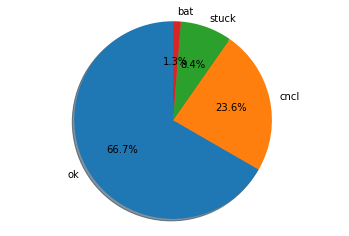

Country is CL
Counts are:

  unique_values  counts
0            ok     100
1          cncl      52
2         stuck      13
3           bat       3

Sample Size of 168


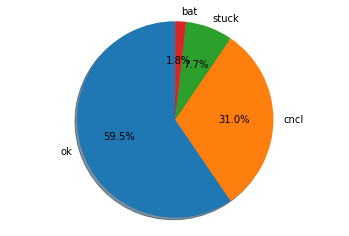

Country is VN
Counts are:

  unique_values  counts
0            ok      88
1          cncl      35
2         stuck       3
3           bat       1

Sample Size of 127


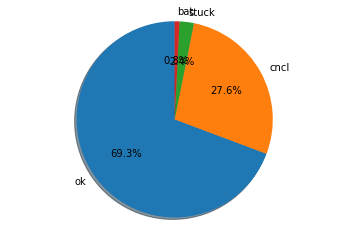

Country is LU
Counts are:

  unique_values  counts
0            ok     196
1          cncl      87
2         stuck       8
3           bat       6

Sample Size of 297


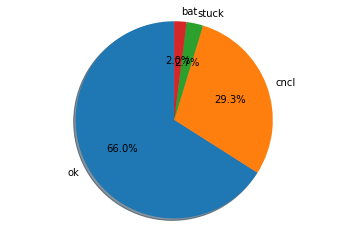

Country is AE
Counts are:

  unique_values  counts
0            ok     136
1          cncl      63
2         stuck       6
3           bat       5

Sample Size of 210


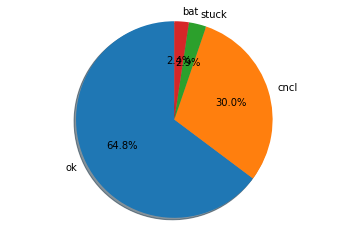

In [15]:
print_chart(c_split, 'Country', 'country_cd')

In [16]:
#There's too many countries. Let's eliminate countries with sample sizes < 4000 to simplify and eliminate biases
c_split_cut = []
for x in c_split:
    count_bf = x['outcome'].value_counts().rename_axis('unique_values').reset_index(name='counts')
    if count_bf['counts'].sum() > 4449:
        c_split_cut.append(x)
        

Country is CA
Counts are:

  unique_values  counts
0            ok    6903
1          cncl    3134
2         stuck     856
3           bat     233

Sample Size of 11126


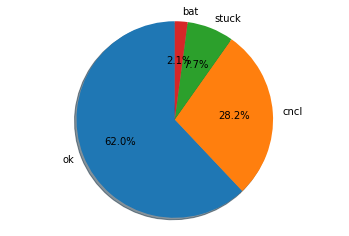

Country is DE
Counts are:

  unique_values  counts
0            ok    5097
1          cncl    2468
2         stuck     542
3           bat     177

Sample Size of 8284


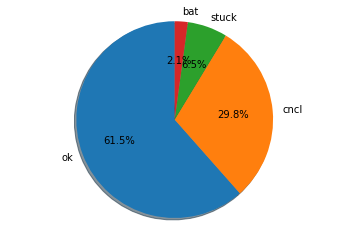

Country is NO
Counts are:

  unique_values  counts
0            ok    2741
1          cncl    1243
2         stuck     388
3           bat     105

Sample Size of 4477


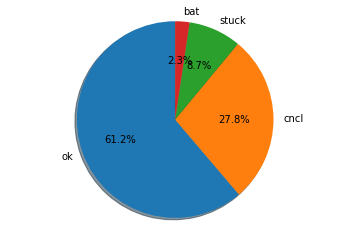

Country is US
Counts are:

  unique_values  counts
0            ok    5182
1          cncl    2310
2         stuck     560
3           bat     169

Sample Size of 8221


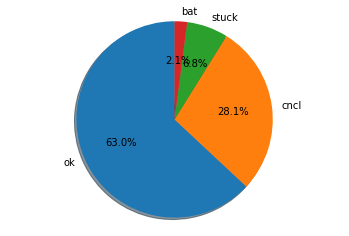

Country is FR
Counts are:

  unique_values  counts
0            ok   11023
1          cncl    4926
2         stuck    1398
3           bat     372

Sample Size of 17719


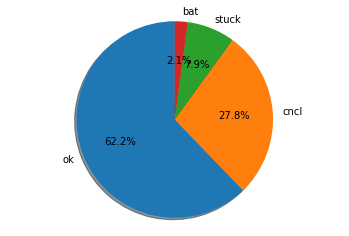

Country is CN
Counts are:

  unique_values  counts
0            ok   13882
1          cncl    5946
2         stuck     780
3           bat     446

Sample Size of 21054


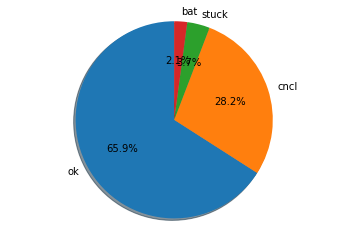

Country is BE
Counts are:

  unique_values  counts
0            ok    3141
1          cncl    1501
2         stuck     365
3           bat     116

Sample Size of 5123


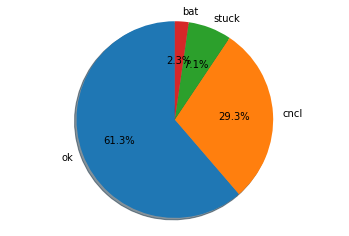

Country is IL
Counts are:

  unique_values  counts
0          cncl  104712
1            ok   97966
2         stuck   11965
3           bat    5476

Sample Size of 220119


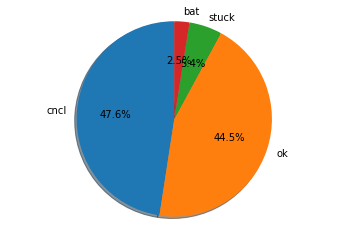

Country is JP
Counts are:

  unique_values  counts
0            ok    7185
1          cncl    3434
2         stuck     860
3           bat     264

Sample Size of 11743


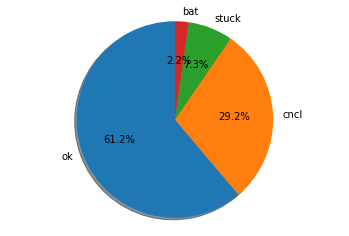

Country is AT
Counts are:

  unique_values  counts
0            ok    6512
1          cncl    3020
2         stuck     775
3           bat     251

Sample Size of 10558


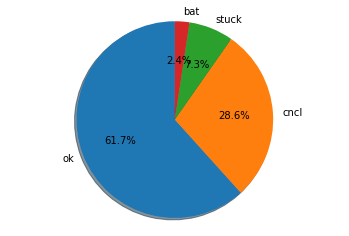

In [17]:
print_chart(c_split_cut, 'Country', 'country_cd')

In [18]:
len(c_split_cut)

10

Country Split
Counts are:

   unique_values  counts
0             IL  220119
1             CN   21054
2             FR   17719
3             JP   11743
4             CA   11126
..           ...     ...
79            PH      13
80            BH       8
81            SX       8
82            AG       8
83            VE       1

[84 rows x 2 columns]

Sample Size of 367607


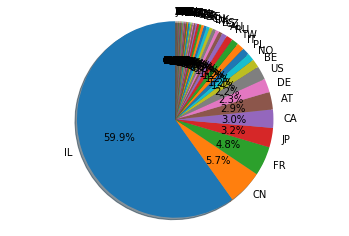

Top 10 Country
Counts are:

  unique_values  counts
0            IL  220119
1            CN   21054
2            FR   17719
3            JP   11743
4            CA   11126
5            AT   10558
6            DE    8284
7            US    8221
8            BE    5123
9            NO    4477

Sample Size of 318424


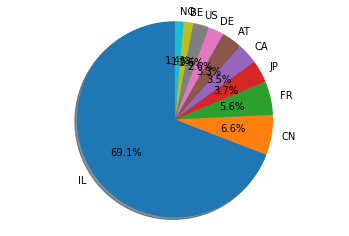

In [19]:
count_bf = master_df['country_cd'].value_counts().rename_axis('unique_values').reset_index(name='counts')
fig1, ax1 = plt.subplots()
ax1.pie(count_bf['counts'], explode= None, labels=count_bf['unique_values'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
print("Country Split")
print("Counts are:")
print()
print(count_bf)
print()
print("Sample Size of {}".format(count_bf['counts'].sum()))
plt.show()

top_ten = pd.concat(c_split_cut)
count_bf = top_ten['country_cd'].value_counts().rename_axis('unique_values').reset_index(name='counts')
fig1, ax1 = plt.subplots()
ax1.pie(count_bf['counts'], explode= None, labels=count_bf['unique_values'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
print("Top 10 Country")
print("Counts are:")
print()
print(count_bf)
print()
print("Sample Size of {}".format(count_bf['counts'].sum()))
plt.show()

# Basic Pie Chart by Country (Takeaway)

Note:
1. We eliminated countries with less than 4500 sample size in order to maintain the integrity of samples and return the top 10 performing countries
2. We chose countries because timezones can often accomadate multiple countries with different consumer nuances.
3. Robot performs mission ok ~60% of the time, with the second majority always being "cancel"
    - Implications:
        - It's taking too long and it's a behaviorial habit in those countries
        - Mission doesn't actually take as long so the user cancels
4. We are over exposed to IL

Next Steps:

-- Check Usage Rate only using these 10 countries

-- Check Usage Rate by Timezone

# Basic Pie Chart by Timezone

In [20]:
#creating groups
t_split = []
for x in time_list:
    df = master_df[master_df['timezone'] == x]
    t_split.append(df)

In [21]:
print(master_df['timezone'].value_counts())


Asia/Jerusalem           221830
Asia/Shanghai             21054
Europe/Paris              17814
Asia/Tokyo                11584
Europe/Vienna             10544
                          ...  
America/Lower_Princes         8
America/Antigua               8
America/Bahia                 8
Asia/Bahrain                  8
America/Caracas               1
Name: timezone, Length: 120, dtype: int64


In [22]:
t_split_cut = []
for x in t_split:
    count_bf = x['outcome'].value_counts().rename_axis('unique_values').reset_index(name='counts')
    if count_bf['counts'].sum() > 4390:
        t_split_cut.append(x)
print(len(t_split_cut))

10


Timezone is Asia/Jerusalem
Counts are:

  unique_values  counts
0          cncl  105163
1            ok   99042
2         stuck   12107
3           bat    5518

Sample Size of 221830


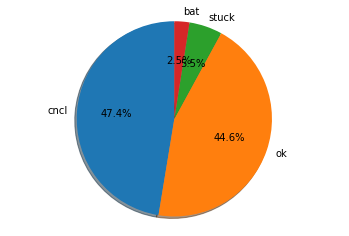

Timezone is Europe/Brussels
Counts are:

  unique_values  counts
0            ok    3141
1          cncl    1501
2         stuck     365
3           bat     116

Sample Size of 5123


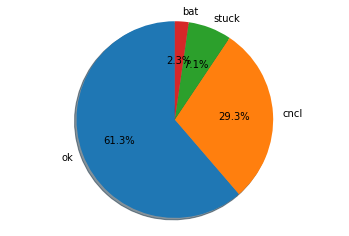

Timezone is Asia/Tokyo
Counts are:

  unique_values  counts
0            ok    7089
1          cncl    3392
2         stuck     845
3           bat     258

Sample Size of 11584


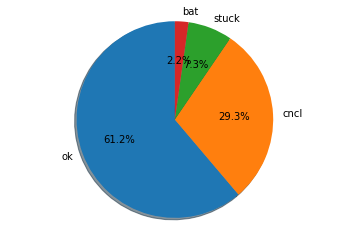

Timezone is Europe/Oslo
Counts are:

  unique_values  counts
0            ok    2722
1          cncl    1229
2         stuck     388
3           bat     105

Sample Size of 4444


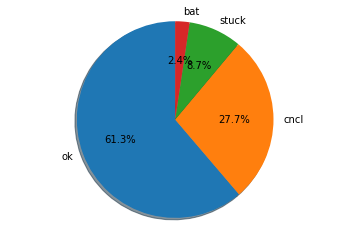

Timezone is America/Toronto
Counts are:

  unique_values  counts
0            ok    4040
1          cncl    1845
2         stuck     510
3           bat     140

Sample Size of 6535


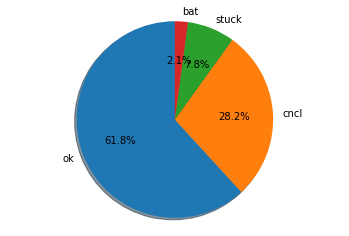

Timezone is Europe/Vienna
Counts are:

  unique_values  counts
0            ok    6493
1          cncl    3019
2         stuck     780
3           bat     252

Sample Size of 10544


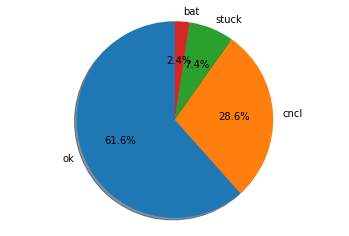

Timezone is Europe/Warsaw
Counts are:

  unique_values  counts
0            ok    2682
1          cncl    1253
2         stuck     353
3           bat     111

Sample Size of 4399


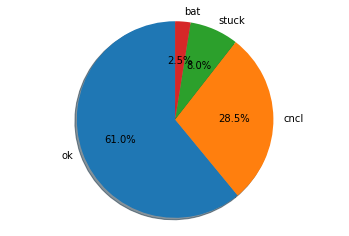

Timezone is Asia/Shanghai
Counts are:

  unique_values  counts
0            ok   13882
1          cncl    5946
2         stuck     780
3           bat     446

Sample Size of 21054


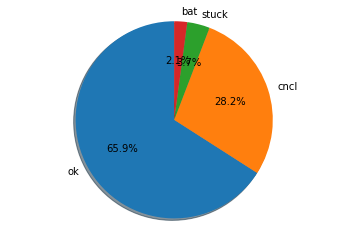

Timezone is Europe/Berlin
Counts are:

  unique_values  counts
0            ok    5097
1          cncl    2468
2         stuck     542
3           bat     177

Sample Size of 8284


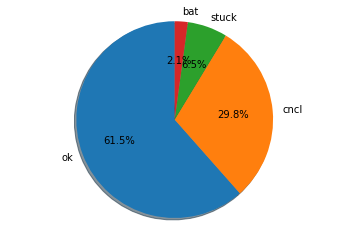

Timezone is Europe/Paris
Counts are:

  unique_values  counts
0            ok   11073
1          cncl    4969
2         stuck    1397
3           bat     375

Sample Size of 17814


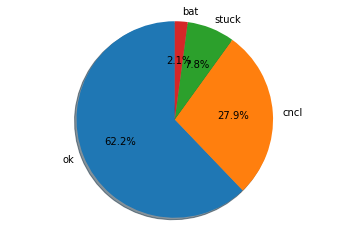

In [23]:
print_chart(t_split_cut, 'Timezone', 'timezone')

Timezone Split
Counts are:

             unique_values  counts
0           Asia/Jerusalem  221830
1            Asia/Shanghai   21054
2             Europe/Paris   17814
3               Asia/Tokyo   11584
4            Europe/Vienna   10544
..                     ...     ...
115  America/Lower_Princes       8
116        America/Antigua       8
117          America/Bahia       8
118           Asia/Bahrain       8
119        America/Caracas       1

[120 rows x 2 columns]

Sample Size of 367607


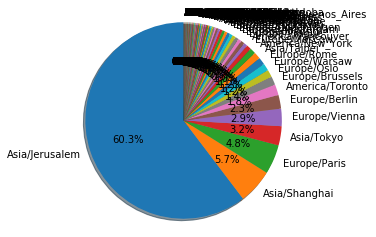

Top 10 Timezones
Counts are:

     unique_values  counts
0   Asia/Jerusalem  221830
1    Asia/Shanghai   21054
2     Europe/Paris   17814
3       Asia/Tokyo   11584
4    Europe/Vienna   10544
5    Europe/Berlin    8284
6  America/Toronto    6535
7  Europe/Brussels    5123
8      Europe/Oslo    4444
9    Europe/Warsaw    4399

Sample Size of 311611


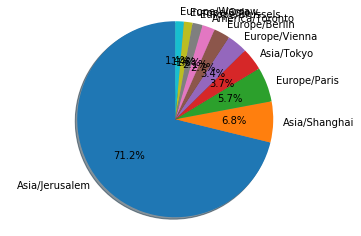

In [24]:
count_bf = master_df['timezone'].value_counts().rename_axis('unique_values').reset_index(name='counts')
fig1, ax1 = plt.subplots()
ax1.pie(count_bf['counts'], explode= None, labels=count_bf['unique_values'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
print("Timezone Split")
print("Counts are:")
print()
print(count_bf)
print()
print("Sample Size of {}".format(count_bf['counts'].sum()))
plt.show()

top_ten = pd.concat(t_split_cut)
count_bf = top_ten['timezone'].value_counts().rename_axis('unique_values').reset_index(name='counts')
fig1, ax1 = plt.subplots()
ax1.pie(count_bf['counts'], explode= None, labels=count_bf['unique_values'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
print("Top 10 Timezones")
print("Counts are:")
print()
print(count_bf)
print()
print("Sample Size of {}".format(count_bf['counts'].sum()))
plt.show()

# Basic Pie Chart by Timezone (Takeaway)

- Behavior (Percentage Split) is very similiar to country
    - Implies timezone penetration is limited to a few countries, hence similiar distribution

This means we can use either timezone or country going forward.

Regarding usage:
- This purely measures total # of missions done per timezone. 

Potential Fallacies:
- Does not take into account few robots but over usage (But as we see below, unique robot_id are relatively the same proportion to the total count of missions - we can discount this fallacy)
- Does not take into account a lot of robots but low min usage (But as we see below, average min usage is about the same (~45 +/- 5 min) - we can discount this fallacy)

Next Steps:

Investigate odd distribution for Asia/Jerusalem

In [25]:
for x in t_split_cut:
    print(x['timezone'].iloc[0])
    print()
    print(x['runm'].describe())
    print()
    print('-------------------------')

Asia/Jerusalem

count    221830.000000
mean         50.527674
std          29.295316
min           0.000000
25%          30.000000
50%          49.000000
75%          70.000000
max         144.000000
Name: runm, dtype: float64

-------------------------
Europe/Brussels

count    5123.000000
mean       47.606090
std        31.126517
min         0.000000
25%        22.000000
50%        46.000000
75%        72.000000
max       119.000000
Name: runm, dtype: float64

-------------------------
Asia/Tokyo

count    11584.000000
mean        47.529955
std         31.324137
min          0.000000
25%         21.000000
50%         46.000000
75%         71.000000
max        119.000000
Name: runm, dtype: float64

-------------------------
Europe/Oslo

count    4444.000000
mean       47.568182
std        31.719193
min         0.000000
25%        21.000000
50%        46.000000
75%        71.000000
max       119.000000
Name: runm, dtype: float64

-------------------------
America/Toronto

count    6535

In [26]:
for x in t_split_cut:
    print(x['timezone'].iloc[0])
    print()
    print(x['robotid'].describe())
    print()
    print('-------------------------')

Asia/Jerusalem

count               221830
unique                5998
top       WZ7X75SA8S96R7BW
freq                   163
Name: robotid, dtype: object

-------------------------
Europe/Brussels

count                 5123
unique                 133
top       TGIZ8GG03PIZ12HO
freq                   147
Name: robotid, dtype: object

-------------------------
Asia/Tokyo

count                11584
unique                 290
top       PKT6LJQJ4371N9N6
freq                   133
Name: robotid, dtype: object

-------------------------
Europe/Oslo

count                 4444
unique                 105
top       04WOL99F4E7QKDL7
freq                   118
Name: robotid, dtype: object

-------------------------
America/Toronto

count                 6535
unique                 169
top       CNQNKWM98JQ6SXTR
freq                   141
Name: robotid, dtype: object

-------------------------
Europe/Vienna

count                10544
unique                 283
top       D00L55IAMODI05ZA
freq     

# Cool Visual 

In [27]:
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3,  country_name_to_country_alpha2
def get_alpha_3(df):
    alpha_3 = []
    for x in df:
        name = country_alpha2_to_country_name(x)
        a3 = country_name_to_country_alpha3(name)
        alpha_3.append(a3)
    df = pd.DataFrame(alpha_3, columns=['alpha_3']) 
    return df

In [28]:
test = master_df['country_cd']
alph = get_alpha_3(test)
alph

,alpha_3
0,ISR
1,ISR
2,ISR
3,ISR
4,ISR
...,...
367602,ISR
367603,ISR
367604,ISR
367605,ISR


In [29]:
alph_func = list(set(alph['alpha_3']))

In [41]:
check = pd.DataFrame(alph_func, columns= ['c'])
check['c'][38]

'SX'

In [46]:
from geopy.geocoders import Nominatim
from time import sleep
geolocator = Nominatim()

def geolocate_lat(df):
    latitude = []
    i = 0
    for x in df:
        #print(i)
        x = country_alpha2_to_country_name(x)
        if i == 38:
            x = 'SX'
        i = i + 1
        loc = geolocator.geocode(x)
        lat = loc.latitude
        latitude.append(lat)
        sleep(1)
    df = pd.DataFrame(latitude, columns=['latitude'])
    return df

def geolocate_long(df):
    longitude = []
    i = 0
    for x in df:
        #print(i)
        x = country_alpha2_to_country_name(x)
        if i == 38:
            x = 'SX'
        i = i + 1
        loc = geolocator.geocode(x)
        long = loc.longitude
        longitude.append(long)
        sleep(1)
    df = pd.DataFrame(longitude, columns=['longitude'])
    return df


/Users/alexanderxu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
alph_func = list(set(master_df['country_cd']))

In [48]:
check = pd.DataFrame(alph_func, columns= ['c'])
check['c'][38]

'SX'

In [49]:
lat = geolocate_lat(alph_func)

In [50]:
long = geolocate_long(alph_func)

In [51]:
#joining lat and long into a data frame
coordinates = pd.concat([lat, long], axis=1)
#making a series from alph_func
alpha_2_codes = pd.DataFrame(alph_func, columns=['country_cd'])
#concat codes with coordinates
code_coordinates = pd.concat([alpha_2_codes, coordinates], axis=1)
code_coordinates

,country_cd,latitude,longitude
0,AD,42.540717,1.573203
1,ZA,-28.816624,24.991639
2,GT,15.635609,-89.898809
3,CA,61.066692,-107.991707
4,BS,24.773655,-78.000055
...,...,...,...
79,IS,64.984182,-18.105901
80,CL,-31.761336,-71.318770
81,VN,13.290403,108.426511
82,LU,49.815868,6.129675


In [52]:
#merge code_coordinates with master
new_master_df = pd.merge(master_df, code_coordinates)
new_master_df

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone,latitude,longitude
0,000NG2FMLJBT9ANZ,2017-10-01 16:17:22,40,3,1,2,stuck,IL,Asia/Jerusalem,31.531311,34.866765
1,000NG2FMLJBT9ANZ,2017-10-03 14:25:56,41,83,0,13,ok,IL,Asia/Jerusalem,31.531311,34.866765
2,000NG2FMLJBT9ANZ,2017-10-04 12:32:51,42,66,13,12,ok,IL,Asia/Jerusalem,31.531311,34.866765
3,000NG2FMLJBT9ANZ,2017-10-26 02:12:55,45,72,24,0,cncl,IL,Asia/Jerusalem,31.531311,34.866765
4,000NG2FMLJBT9ANZ,2017-10-27 07:17:39,46,61,9,0,cncl,IL,Asia/Jerusalem,31.531311,34.866765
...,...,...,...,...,...,...,...,...,...,...,...
367602,Z30W4F8SWXX1LP3E,2016-12-26 05:30:14,134,21,0,0,ok,SR,America/Paramaribo,4.141303,-56.077119
367603,Z30W4F8SWXX1LP3E,2016-12-27 06:05:05,135,66,0,14,cncl,SR,America/Paramaribo,4.141303,-56.077119
367604,Z30W4F8SWXX1LP3E,2016-12-28 19:30:11,136,8,0,1,ok,SR,America/Paramaribo,4.141303,-56.077119
367605,Z30W4F8SWXX1LP3E,2016-12-29 09:55:00,137,60,15,0,cncl,SR,America/Paramaribo,4.141303,-56.077119


coordinates = pd.concat([lat, long], axis=1)
alpha_3_codes = pd.DataFrame(alph_func, columns=['alpha_3'])
code_coordinates = pd.concat([alpha_3_codes, coordinates], axis=1)
code_coordinates

#concat master with a3 code
a3_master_df = pd.concat([master_df, alph], axis=1)
#merge code_coordinates with master
new_master_df = pd.merge(a3_master_df, code_coordinates)
new_master_df

In [53]:
#making map!
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
MarkerCluster()
#empty map
#world_map= folium.Map(tiles="cartodbpositron")
#marker_cluster = MarkerCluster().add_to(world_map)

locations = new_master_df[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

a3_master_df

In [54]:
country_values = new_master_df['country_cd'].value_counts().rename_axis('country_cd').reset_index(name='counts')
graph = pd.merge(code_coordinates,country_values )
graph

,country_cd,latitude,longitude,counts
0,AD,42.540717,1.573203,50
1,ZA,-28.816624,24.991639,76
2,GT,15.635609,-89.898809,120
3,CA,61.066692,-107.991707,11126
4,BS,24.773655,-78.000055,85
...,...,...,...,...
79,IS,64.984182,-18.105901,237
80,CL,-31.761336,-71.318770,168
81,VN,13.290403,108.426511,127
82,LU,49.815868,6.129675,297


In [55]:
locations = graph[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[2.8894434, -73.783892]

In [56]:
maps = folium.Map(location=[35.08, -106.62], tiles='CartoDB dark_matter', zoom_start=8)


for point in range(0, len(locationlist)):
    if graph['counts'][point] < 1000:
        color = 'lightgreen'
    if 1000 < graph['counts'][point] < 3000:
        color = 'green'
    if 3000 < graph['counts'][point] < 5000:
        color = 'darkgreen'
    if 5000 < graph['counts'][point] < 7500:
        color = 'lightred'
    if 7500 < graph['counts'][point] < 10000:
        color = 'orange'
    if 10000 < graph['counts'][point] < 20000:
        color = 'red'
    if 20000 < graph['counts'][point] < 24999:
        color = 'darkred'
    if graph['counts'][point] > 24999:
        color = 'black'
    folium.Marker(locationlist[point],icon= folium.Icon(color=color),popup="{} with Sample Size: {}".format(graph['country_cd'][point], graph['counts'][point])).add_to(maps)

In [57]:
maps

In [58]:
maps2 = folium.Map(location=[35.08, -106.62], tiles='Stamen Terrain', zoom_start=8)


for point in range(0, len(locationlist)):
    if graph['counts'][point] < 500:
        color = 'lightgray'
    if 500 < graph['counts'][point] < 1000:
        color = 'lightgreen'
    if 1000 < graph['counts'][point] < 3000:
        color = 'green'
    if 3000 < graph['counts'][point] < 5000:
        color = 'darkgreen'
    if 5000 < graph['counts'][point] < 7500:
        color = 'lightred'
    if 7500 < graph['counts'][point] < 10000:
        color = 'orange'
    if 10000 < graph['counts'][point] < 20000:
        color = 'red'
    if 20000 < graph['counts'][point] < 24999:
        color = 'darkred'
    if graph['counts'][point] > 24999:
        color = 'black'
    folium.Marker(locationlist[point],icon= folium.Icon(color=color),popup="{} with Sample Size: {}".format(graph['country_cd'][point], graph['counts'][point])).add_to(maps2)

In [59]:
maps2

In [121]:
loc = geolocator.geocode('Israel')
lat = loc.latitude
lon = loc.longitude
maps = folium.Map(location=[lat, lon], tiles='Stamen Terrain', zoom_start=5)
maps

In [164]:
name = country_alpha2_to_country_name('GE')
print(name)
code = country_name_to_country_alpha2(name)
print(code)
loc = geolocator.geocode(code)
lat = loc.latitude
lon = loc.longitude
maps = folium.Map(location=[lat, lon], tiles='Stamen Terrain', zoom_start=5)
maps

Georgia
GE


maps = folium.Map(location=[35.08, -106.62], tiles='CartoDB dark_matter', zoom_start=8)

marker_cluster = MarkerCluster().add_to(maps)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=new_master_df['country_cd'][point]).add_to(marker_cluster)


maps2 = folium.Map(location=[35.08, -106.62], tiles='CartoDB dark_matter', zoom_start=8)

marker_cluster2 = MarkerCluster().add_to(maps2)

for point in range(0, (len(locationlist)-350000)):
    folium.Marker(locationlist[point], popup=new_master_df['country_cd'][point]).add_to(marker_cluster2)

In [51]:
from IPython.display import display

In [174]:
loc = geolocator.geocode('ESP')
# And return latitude and longitude
print(loc.latitude)
print(loc.longitude)

40.9952939
-8.624463216301837


# Question 1 (Pt.1) : 

Are there geographic differences in robot usage?

Yes, we are clearly over exposed to the country IL, in the Asia/Jerusalem timezone in terms of robot usage. Since #of Robots is proportional to #missions (sample size) for all country/timezone, #min used average is consistent throughout country/timezone, the only differentiator is #missions(sample size). Hence, we can unequivocally say there is a difference.

A particular note: Despite the high usage rate in this time zone, we also see that it stands out in its distribution of outcome, with User Cancellation taking the majority of the split

# Tasks for Question 1 (Pt.2)

Consider all descriptive features of a mission, including when and how frequently it occurred.

Example(When its ok, the mean runm is ___ )

- Correlate features into explaining the differences.


    - Explain the distribution by its features (Asia/Jerusalem vs others)
        - Bar graph (filtered by timezone) of runm, chrgm, etc.
        
    - Feature impact on outcome
        - Multi-Regression
        - Decision Tree (Statements Used)
        - SelectKBest
        
    - Depending on feature takeaway, make recomendations

# Feature Engineering

Proposal for Feature Transformation:
1. Year: There could be discrepancy between years due to the deployment of new models
    Caution: Can't attribute influx of usage to year (Growth driven by other features)
    
    
2. Month: Depending on climate, can be used as a proxy for seasonal use. 
    Caution: Same caution for year

In [60]:
master_df

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone
0,000NG2FMLJBT9ANZ,2017-10-01 16:17:22,40,3,1,2,stuck,IL,Asia/Jerusalem
1,000NG2FMLJBT9ANZ,2017-10-03 14:25:56,41,83,0,13,ok,IL,Asia/Jerusalem
2,000NG2FMLJBT9ANZ,2017-10-04 12:32:51,42,66,13,12,ok,IL,Asia/Jerusalem
3,000NG2FMLJBT9ANZ,2017-10-26 02:12:55,45,72,24,0,cncl,IL,Asia/Jerusalem
4,000NG2FMLJBT9ANZ,2017-10-27 07:17:39,46,61,9,0,cncl,IL,Asia/Jerusalem
...,...,...,...,...,...,...,...,...,...
367602,ZZUJVI3GXRLIG0MT,2017-12-06 10:37:48,78,62,27,20,ok,IL,Asia/Jerusalem
367603,ZZUJVI3GXRLIG0MT,2017-12-07 12:10:54,79,84,0,0,cncl,IL,Asia/Jerusalem
367604,ZZUJVI3GXRLIG0MT,2017-12-07 20:53:02,80,23,0,5,ok,IL,Asia/Jerusalem
367605,ZZUJVI3GXRLIG0MT,2017-12-08 00:44:07,81,70,0,0,cncl,IL,Asia/Jerusalem


In [61]:
#seperate datetime column into a list of lists, containing the split string
datetime = master_df['datetime']
date_list = []
for x in datetime:
    date_list.append(x.split('-'))
    

In [62]:
#use date_list to create two new series

#first make the year and month lists
year = []
month = []
for x in date_list:
    year.append(x[0])
    month.append(x[1])
    
#make df series
year = pd.DataFrame(year, columns= ['year'])
month = pd.DataFrame(month, columns= ['month'])

#concat them
feature_master = pd.concat([master_df, year, month], axis=1)

In [63]:
feature_master

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone,year,month
0,000NG2FMLJBT9ANZ,2017-10-01 16:17:22,40,3,1,2,stuck,IL,Asia/Jerusalem,2017,10
1,000NG2FMLJBT9ANZ,2017-10-03 14:25:56,41,83,0,13,ok,IL,Asia/Jerusalem,2017,10
2,000NG2FMLJBT9ANZ,2017-10-04 12:32:51,42,66,13,12,ok,IL,Asia/Jerusalem,2017,10
3,000NG2FMLJBT9ANZ,2017-10-26 02:12:55,45,72,24,0,cncl,IL,Asia/Jerusalem,2017,10
4,000NG2FMLJBT9ANZ,2017-10-27 07:17:39,46,61,9,0,cncl,IL,Asia/Jerusalem,2017,10
...,...,...,...,...,...,...,...,...,...,...,...
367602,ZZUJVI3GXRLIG0MT,2017-12-06 10:37:48,78,62,27,20,ok,IL,Asia/Jerusalem,2017,12
367603,ZZUJVI3GXRLIG0MT,2017-12-07 12:10:54,79,84,0,0,cncl,IL,Asia/Jerusalem,2017,12
367604,ZZUJVI3GXRLIG0MT,2017-12-07 20:53:02,80,23,0,5,ok,IL,Asia/Jerusalem,2017,12
367605,ZZUJVI3GXRLIG0MT,2017-12-08 00:44:07,81,70,0,0,cncl,IL,Asia/Jerusalem,2017,12


In [64]:
#We are going to evaluate Asia/Jerusalem timezone seperately from the rest of the world
#This is due to its unique distribution of usage (Quantity) and its outlierish Outcome and Runm stats

In [65]:
aj = feature_master.loc[feature_master['timezone'] == 'Asia/Jerusalem']
rw = feature_master.loc[feature_master['timezone'] != 'Asia/Jerusalem']

Asia/Jerusalem 

In [81]:
def plot_hist (data, binwidth, title, bins):
    if bins == 1:
        plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth))
        plt.title(title)
        plt.ylabel('counts')
        plt.show()
    else:
        plt.hist(data)
        plt.title(title)
        plt.ylabel('counts')
        plt.show()

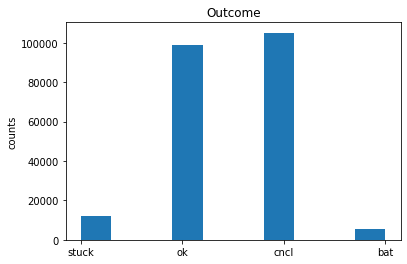

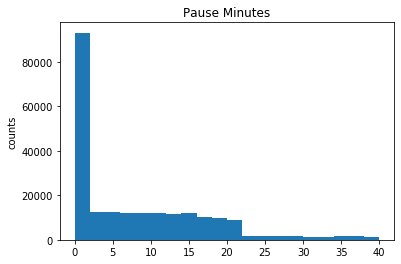

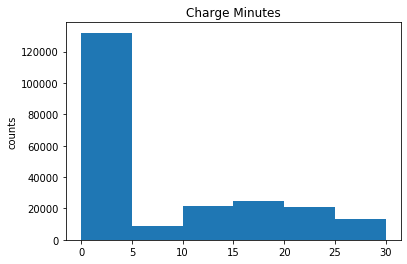

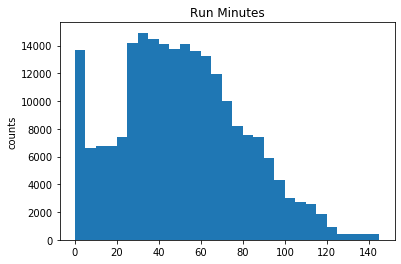

In [82]:
plot_hist(aj['outcome'], 0, 'Outcome',0)
plot_hist(aj['pausem'], 2, 'Pause Minutes',1)
plot_hist(aj['chrgm'], 5, 'Charge Minutes',1)
plot_hist(aj['runm'], 5, 'Run Minutes',1)

That wasn't very helpful... Lets try and further filter by outcome!

In [83]:
aj_ok = aj.loc[aj['outcome'] == 'ok']
aj_cncl = aj.loc[aj['outcome'] == 'cncl']
aj_bat = aj.loc[aj['outcome'] == 'bat']
aj_stuck = aj.loc[aj['outcome'] == 'stuck']

In [86]:
#function to repeat our earlier process
def outcome_brkdwn(data, p, c, r):
    plot_hist(data['pausem'], p, 'Pause Minutes',1)
    plot_hist(data['chrgm'], c, 'Charge Minutes',1)
    plot_hist(data['runm'], r, 'Run Minutes',1)

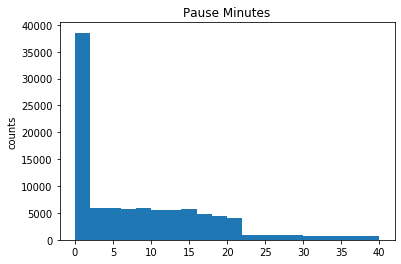

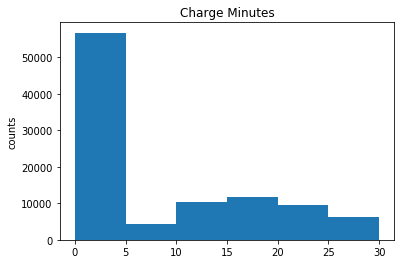

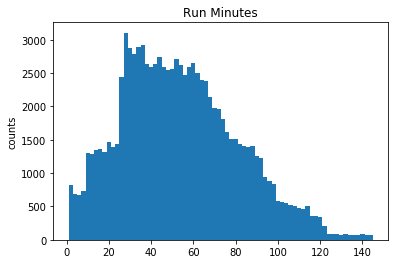

In [109]:
#outcome = ok
outcome_brkdwn(aj_ok,2,5,2)

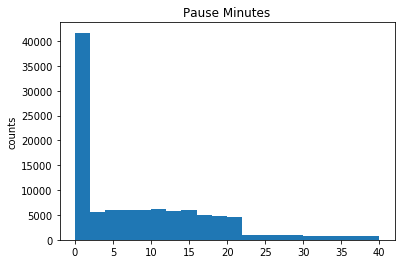

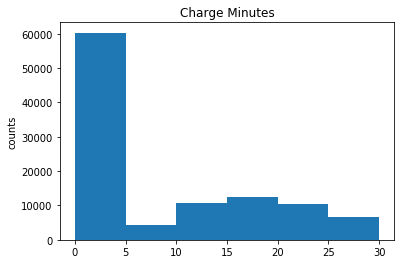

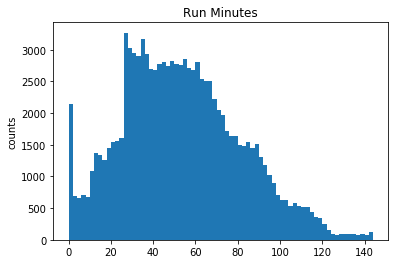

In [108]:
#outcome = cncl
outcome_brkdwn(aj_cncl,2,5,2)

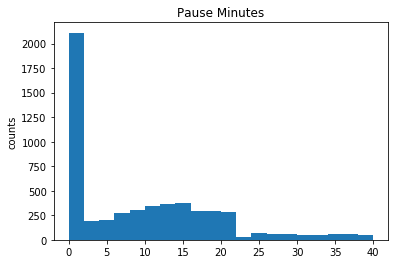

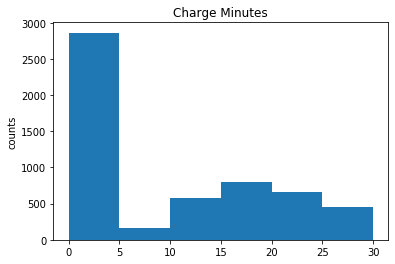

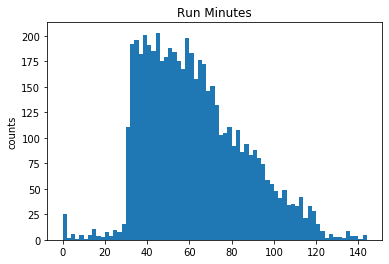

In [107]:
#outcome = bat
outcome_brkdwn(aj_bat,2,5,2)

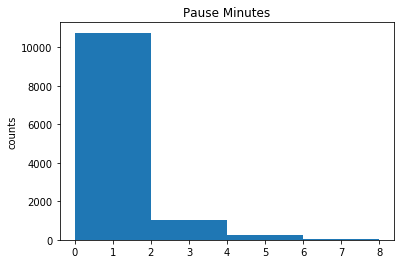

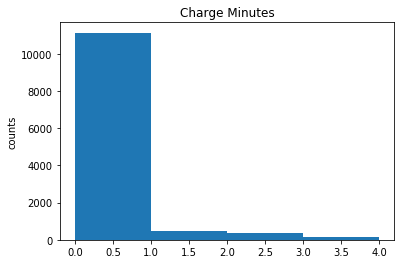

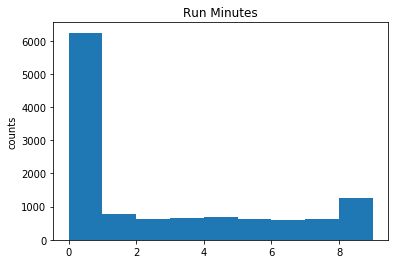

In [95]:
#outcome = stuck
outcome_brkdwn(aj_stuck,2,1,1)

# Takeaway:

Tolerance level for a mission seems to drop off after 1 hour

This Means:
- Robot has a time window between 25 - 65 window to execute mission before the robot will be terminated.


    This could explain why the graphs are so similiar! User patience begins to drop off after 60 min
    
- Robot does not have good detection in terms of completing a project --> prolonging missions unneccesarily.
    If stopped -> cncled
    If cont    -> ok
    
    
    This could explain why the graphs are so similiar! User patience begins to drop off after 60 min at a half life of 50% 

Rest of the world

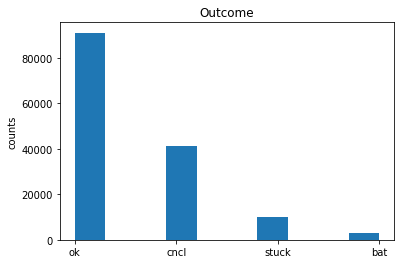

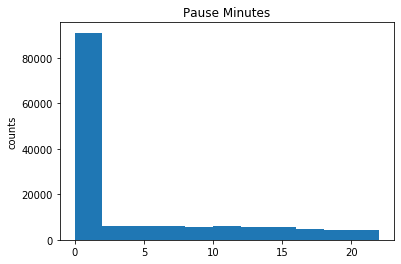

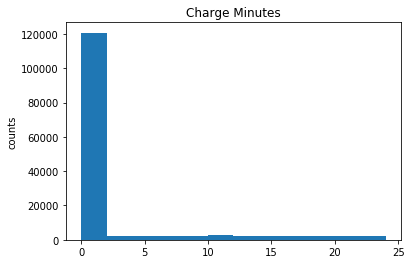

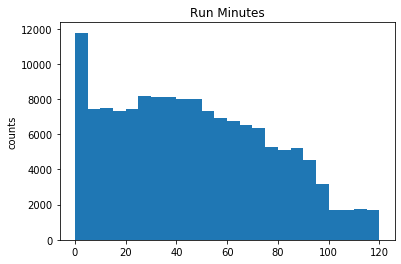

In [97]:
plot_hist(rw['outcome'], 0, 'Outcome',0)
plot_hist(rw['pausem'], 2, 'Pause Minutes',1)
plot_hist(rw['chrgm'], 2, 'Charge Minutes',1)
plot_hist(rw['runm'], 5, 'Run Minutes',1)

Let's break it down by outcomes again

In [99]:
rw_ok = rw.loc[rw['outcome'] == 'ok']
rw_cncl = rw.loc[rw['outcome'] == 'cncl']
rw_bat = rw.loc[rw['outcome'] == 'bat']
rw_stuck = rw.loc[rw['outcome'] == 'stuck']

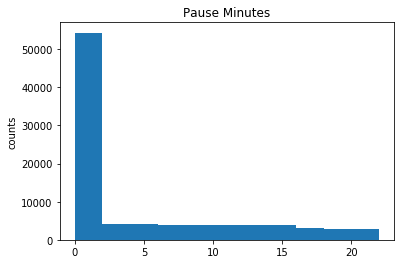

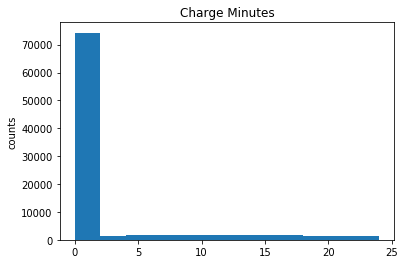

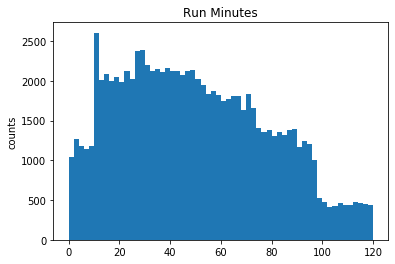

In [110]:
outcome_brkdwn(rw_ok,2,2,2)

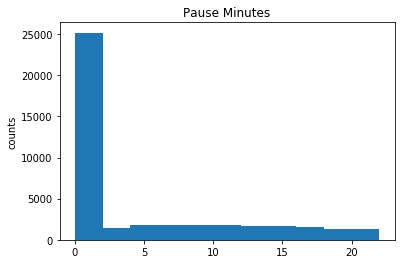

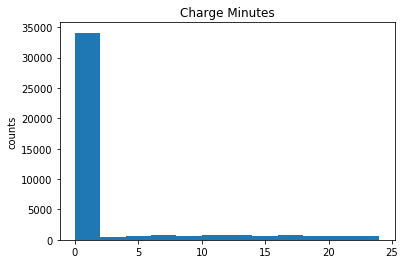

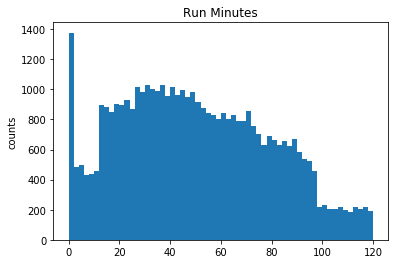

In [105]:
outcome_brkdwn(rw_cncl,2,2,2)

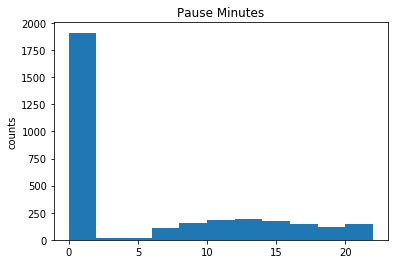

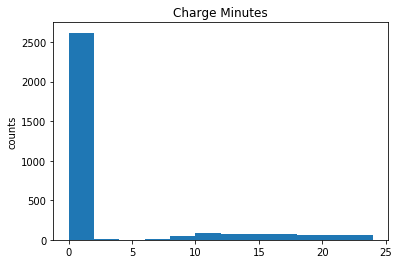

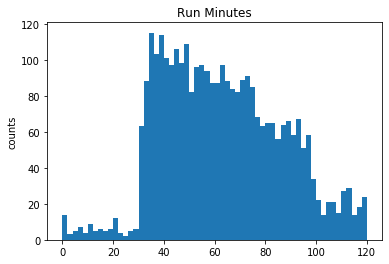

In [106]:
outcome_brkdwn(rw_bat,2,2,2)

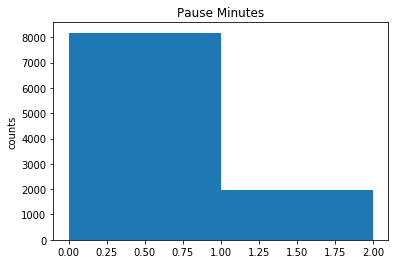

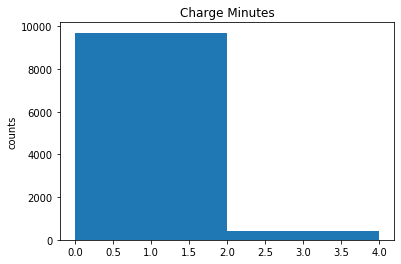

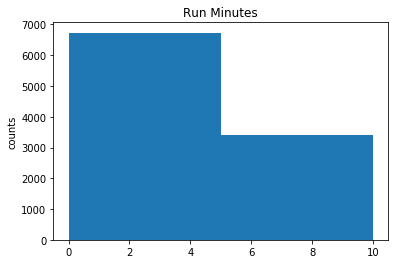

In [104]:
outcome_brkdwn(rw_stuck,1,2,5)

# Takeaway:

Jobs are shorter for the rest of the world (Peaks + Begins Plateu at 15 min vs ~ 25) with a more precipitous drop off at around 55min (vs the 65 min from ISR)
- Plateau duration last just as long, except RW intervals are left shifted by 10 min
- Precitous drop (RW) vs Steep drop (ISR)

Pause min is a lot longer for Robots that are stuck in the AJ market (max.6) whereas Robots that are stuck in RW market maxes out at 2, with less than a sixth in representation

In total, the robot is run 20 min less in RW than in AJ



This Means:

Robot has a time window between 15 - 55 window to execute mission before the robot begin be termination downtrend

- Perhaps jobs expected to be done by the robots are more extensive, hence patience is increased? This would explain the longer run times. Robots are stuck more often and for longer which could also be the result of longer expected time value missions

# What we derived

- Consumer behavior: The robot is used for much longer in AJ
- Consumer behavior: The robot is given more time to do its job in AJ, but see's a steep cancel rate after 65

# What I still need to address

- Why is cancel rate still so much higher in AJ despite similar feature performances as RW?
    - Potential Method: Check feature correlation for AJ using models

# Feature Importance

Here I am going to evaluate the statistical importance of our features. Hopefully this will help to explain why we see the disparity results

Methods Used:
- Chi2 Test 
    - F Score
    - P Value
- Decision Tree 

In [114]:
outcome = pd.get_dummies( feature_master[['outcome']])

In [115]:
outcome_ok = outcome['outcome_ok']
outcome_bat = outcome['outcome_bat']
outcome_cncl = outcome['outcome_cncl']
outcome_stuck = outcome['outcome_stuck']

In [119]:
feature_master

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone,year,month
0,000NG2FMLJBT9ANZ,2017-10-01 16:17:22,40,3,1,2,stuck,IL,Asia/Jerusalem,2017,10
1,000NG2FMLJBT9ANZ,2017-10-03 14:25:56,41,83,0,13,ok,IL,Asia/Jerusalem,2017,10
2,000NG2FMLJBT9ANZ,2017-10-04 12:32:51,42,66,13,12,ok,IL,Asia/Jerusalem,2017,10
3,000NG2FMLJBT9ANZ,2017-10-26 02:12:55,45,72,24,0,cncl,IL,Asia/Jerusalem,2017,10
4,000NG2FMLJBT9ANZ,2017-10-27 07:17:39,46,61,9,0,cncl,IL,Asia/Jerusalem,2017,10
...,...,...,...,...,...,...,...,...,...,...,...
367602,ZZUJVI3GXRLIG0MT,2017-12-06 10:37:48,78,62,27,20,ok,IL,Asia/Jerusalem,2017,12
367603,ZZUJVI3GXRLIG0MT,2017-12-07 12:10:54,79,84,0,0,cncl,IL,Asia/Jerusalem,2017,12
367604,ZZUJVI3GXRLIG0MT,2017-12-07 20:53:02,80,23,0,5,ok,IL,Asia/Jerusalem,2017,12
367605,ZZUJVI3GXRLIG0MT,2017-12-08 00:44:07,81,70,0,0,cncl,IL,Asia/Jerusalem,2017,12


In [123]:
fi_df = feature_master.drop(columns=['outcome', 'robotid', 'datetime','country_cd', 'timezone'])
fi_df['year'] = pd.to_numeric(fi_df['year']) 
fi_df['month'] = pd.to_numeric(fi_df['month']) 

outcome = ok

In [124]:
ok = pd.concat([fi_df, outcome_ok], axis=1)

In [125]:
ok

,nmssn,runm,chrgm,pausem,year,month,outcome_ok
0,40,3,1,2,2017,10,0
1,41,83,0,13,2017,10,1
2,42,66,13,12,2017,10,1
3,45,72,24,0,2017,10,0
4,46,61,9,0,2017,10,0
...,...,...,...,...,...,...,...
367602,78,62,27,20,2017,12,1
367603,79,84,0,0,2017,12,0
367604,80,23,0,5,2017,12,1
367605,81,70,0,0,2017,12,0


In [127]:
col = fi_df.columns

In [126]:
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score

In [133]:
f_score = chi2(fi_df, outcome_ok)

In [134]:
pval_ok = pd.Series(f_score[1], index=col)
pval_ok.sort_values(ascending = True, inplace = True)

In [135]:
pval_ok

runm      0.000000e+00
chrgm     0.000000e+00
pausem    9.350397e-11
nmssn     7.011818e-09
month     4.370992e-01
year      9.975310e-01
dtype: float64

In [137]:
fval_ok = pd.Series(f_score[0], index=col)
fval_ok.sort_values(ascending = False, inplace = True)
fval_ok

runm      46269.692400
chrgm      1998.860433
pausem       41.952788
nmssn        33.531527
month         0.603886
year          0.000010
dtype: float64

In [139]:
def feature_importance(x, y, title):
    print("Feature importance for {}".format(title))
    f_score = chi2(x, y)
    print()
    print('P-Value')
    print()
    pval_ok = pd.Series(f_score[1], index=col)
    pval_ok.sort_values(ascending = True, inplace = True)
    print(pval_ok)
    print()
    print('F-VScore')
    print()
    fval_ok = pd.Series(f_score[0], index=col)
    fval_ok.sort_values(ascending = False , inplace = True)
    print(fval_ok)

In [140]:
feature_importance(fi_df, outcome_ok, 'Ok')

Feature importance for Ok

P-Value

runm      0.000000e+00
chrgm     0.000000e+00
pausem    9.350397e-11
nmssn     7.011818e-09
month     4.370992e-01
year      9.975310e-01
dtype: float64

F-VScore

runm      46269.692400
chrgm      1998.860433
pausem       41.952788
nmssn        33.531527
month         0.603886
year          0.000010
dtype: float64


In [141]:
feature_importance(fi_df, outcome_cncl, 'Canceled')

Feature importance for Canceled

P-Value

runm      0.000000
chrgm     0.000000
pausem    0.000000
month     0.004523
nmssn     0.386737
year      0.991347
dtype: float64

F-VScore

runm      48442.203624
chrgm     37261.180676
pausem    23301.808087
month         8.061112
nmssn         0.749177
year          0.000118
dtype: float64


In [142]:
feature_importance(fi_df, outcome_stuck, 'Stuck')

Feature importance for Stuck

P-Value

runm      0.000000e+00
chrgm     0.000000e+00
pausem    0.000000e+00
nmssn     2.306445e-49
month     1.486595e-13
year      9.701118e-01
dtype: float64

F-VScore

runm      1.033885e+06
pausem    1.315349e+05
chrgm     1.154390e+05
nmssn     2.181362e+02
month     5.458775e+01
year      1.403858e-03
dtype: float64


In [143]:
feature_importance(fi_df, outcome_bat, 'Battery')

Feature importance for Battery

P-Value

runm      0.000000e+00
chrgm     0.000000e+00
pausem    0.000000e+00
nmssn     4.445951e-12
month     9.102249e-01
year      9.890947e-01
dtype: float64

F-VScore

runm      31961.186684
chrgm      3376.184890
pausem     3119.654245
nmssn        47.917240
month         0.012714
year          0.000187
dtype: float64


# Takeaway:

- Run Minute and Charge has the correlation. This tells me that the main issue that keeps the robot from achieving its mission is the duration of the mission and the fact that it needs to charge too much.

Recomendation: Increase battery life and decrease charge time, especially during the mission only charge for enough and not full capacity

Decision Tree Method

In [151]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

In [200]:
def tree_test(x, y, title):
    print("Feature importance for {}".format(title))
    # Create empty DecisionTree
    clf = tree.DecisionTreeClassifier()

    #fit our decision tree with inputs, target
    clf_train = clf.fit(x, y)

    # Render our tree.
    #dot_data = tree.export_graphviz(
        #clf_train, out_file=None,
        #feature_names=x.columns,
        #class_names= ['yeet', 'nah'],
        #filled=True
    #)
    feat_importance = clf.tree_.compute_feature_importances(normalize=False)
    #print("feat importance = " + str(feat_importance))
    score = pd.Series(feat_importance)
    features = pd.Series(col)
    df = pd.concat([features, score], axis=1)
    df.columns = ["Feature", "Score"]
    df = df.sort_values(by='Score', ascending=True)
    print(df)
    print()
    #graph = pydotplus.graph_from_dot_data(dot_data)
    #Image(graph.create_png())

In [201]:
tree_test(fi_df, outcome_ok, 'Ok')
tree_test(fi_df, outcome_cncl, 'Canceled')
tree_test(fi_df, outcome_stuck, 'Stuck')
tree_test(fi_df, outcome_bat, 'Battery')

Feature importance for Ok
  Feature     Score
3  pausem  0.013174
2   chrgm  0.014511
4    year  0.024427
5   month  0.094435
1    runm  0.118415
0   nmssn  0.185773

Feature importance for Canceled
  Feature     Score
2   chrgm  0.013805
3  pausem  0.013835
4    year  0.023800
5   month  0.094050
1    runm  0.099963
0   nmssn  0.180216

Feature importance for Stuck
  Feature     Score
3  pausem  0.001122
2   chrgm  0.001495
4    year  0.001503
5   month  0.006039
0   nmssn  0.015860
1    runm  0.070584

Feature importance for Battery
  Feature     Score
4    year  0.002740
2   chrgm  0.003147
3  pausem  0.004166
5   month  0.008732
1    runm  0.009040
0   nmssn  0.014195



The reason why there's more cancel rates in ISR is because they are using it for longer 
-> Causes more stress on the battery
-> Longer charge times
-> More likely to cancel

This explains why the chrgm has such a low gini score (Because it serves as a proxy for battery usage/strain)


This also explains why runm plays a huge role in p-value, but small in gini (The runm acitivty induces the chrgm, so there's a correlation - Long runm @threshold = long chrgm). 
    - Also explains why it runm has bad gini score (Decision Trees account for multi-collinearity!)
    - Also explains the 10 min greater upper limit of chrgm in AJ vs RW histogram


This also explains why runm's graph

This also explains why year is so important for Battery (Newer the battery, less attrition)

Tentative Conclusion:

People cancel because the robot takes too long to charge primarily (w/ sharp threshold at 20 min). It gets stuck too much due to largely pauses, but the high chrgm metrics makes me think that the robot has issues re-navigating after using the charge doc. Year plays a huge role for battery death because of the compounded strain of older models, but a low bat charge time could also play a huge factor. The reason OK is largely affected by bat is because it must have a low charge time to avoid cancellation, and pauses are also low since this indicates low navigational issues.

Reason our statiscal analysis came out different between F-Test and Gini is due to the decision tree accounding for multi-collinearity. Our hypothesis is that the chrgm and pausem are both key drivers of the runm metric, thus the low p-value. 

Our hypothesis also accounts for our historgram outputs. The reason why the Asia/Jer's peak/plateu of runm before sharp decline in the Ok and Canceled is 10 min to the right of the rest of the world is because the interval of chrgm is increased by 10min on the upper bound. This apparently pierced some consumer behavioral threshold, perhaps patience, and thus saw a spike in cancellations in the histogram graph and caused the ~40% cancellation rate found in the A/J timezone.

# Question 1 Answer

# Conclusion

Geographical Difference:

I begin by noting the geographical usage rate difference. We are clearly over exposed to the country IL, in the Asia/Jerusalem timezone in terms of robot usage. Since #of Robots is proportional to #missions (sample size) for all country/timezone is consistent throughout country/timezone, the only differentiators are #missions(sample size) and #min used average, which saw Asia/Jerusalem being 6% ( ~3 min ) longer than any other timezones and the country IL being 10% ( ~5 ) greater than any other country.  Hence, we can unequivocally say there is a difference.

Feature Analysis: 

People cancel because the robot takes too long to charge primarily (w/ sharp threshold at 20 min). It gets stuck too much due to largely pauses, but the high chrgm metrics makes me think that the robot has issues re-navigating after using the charge doc. Year plays a huge role for battery death because of the compounded strain of older models, but a low bat charge time could also play a huge factor. The reason OK is largely affected by bat is because it must have a low charge time to avoid cancellation, and pauses are also low since this indicates low navigational issues.

Reason my statiscal analysis came out different between F-Test ( Where runm was the clear driver ) and Gini ( chrgm and pausem ) is due to the decision tree accounting for multi-collinearity. My hypothesis is that the chrgm and pausem are both key drivers of the runm metric, thus the low p-value for runm. However, since the decision accounts for the multi-collinearity of features, we see that pause and chrgm maintains their importance whereas runm dips in value. 

Our hypothesis also accounts for our historgram outputs. The reason why the Asia/Jer's peak/plateu of runm before sharp decline in the Ok and Canceled is 10 min to the right of the rest of the world is because the interval of chrgm is increased by 10min on the upper bound. This apparently pierced some consumer behavioral threshold, perhaps patience, and thus saw a spike in cancellations in the histogram graph and caused the ~40% cancellation rate found in the A/J timezone.

Recommendation:

Based on my analysis, there must be hardware improvements as well as navigational improvements to the product in order to eliminate the disparity found in AJ and the rest of the world. Namely, this means reducing the outcome distribution to match, if not improve upon the rest of the world. We've identified battery charge and pause times as the main drivers. My recommendation are as follows:

1. Make battery more efficient at charging
    - This serves to reduce charging time, especially during "in-mission"
    
    
2. Make battery last longer
    - This serves to reduce the frequency to charge during "in-mission" scenarios
    
    
3. Refine mission progress analysis
    - This serves to better ascertain the length of time needed to charge during "in-mission" scenarios and not waste a second more charging
    
    
4. Improve navigational algorithm
    - This serves to reduce pause time
    
    
5. Create alert system when robot is in pause state for too long
    - This serves to let the owner know it's stuck or remind owner of its state. Goal is to resume the mission.


# Question 2

2. Calculate the time between consecutive missions for each robot ("inter-mission interval" or "IMI"). Describe any interesting relationships between IMI and other features of robot behavior.

In [202]:
feature_master

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone,year,month
0,000NG2FMLJBT9ANZ,2017-10-01 16:17:22,40,3,1,2,stuck,IL,Asia/Jerusalem,2017,10
1,000NG2FMLJBT9ANZ,2017-10-03 14:25:56,41,83,0,13,ok,IL,Asia/Jerusalem,2017,10
2,000NG2FMLJBT9ANZ,2017-10-04 12:32:51,42,66,13,12,ok,IL,Asia/Jerusalem,2017,10
3,000NG2FMLJBT9ANZ,2017-10-26 02:12:55,45,72,24,0,cncl,IL,Asia/Jerusalem,2017,10
4,000NG2FMLJBT9ANZ,2017-10-27 07:17:39,46,61,9,0,cncl,IL,Asia/Jerusalem,2017,10
...,...,...,...,...,...,...,...,...,...,...,...
367602,ZZUJVI3GXRLIG0MT,2017-12-06 10:37:48,78,62,27,20,ok,IL,Asia/Jerusalem,2017,12
367603,ZZUJVI3GXRLIG0MT,2017-12-07 12:10:54,79,84,0,0,cncl,IL,Asia/Jerusalem,2017,12
367604,ZZUJVI3GXRLIG0MT,2017-12-07 20:53:02,80,23,0,5,ok,IL,Asia/Jerusalem,2017,12
367605,ZZUJVI3GXRLIG0MT,2017-12-08 00:44:07,81,70,0,0,cncl,IL,Asia/Jerusalem,2017,12


In [208]:
from datetime import datetime

d1 = datetime.strptime("2015-08-10 19:33:27", "%Y-%m-%d %H:%M:%S")
d2 = datetime.strptime("2015-08-10 19:31:28", "%Y-%m-%d %H:%M:%S")

In [209]:
s = d1 - d2

In [211]:
print(s)

0:01:59


In [215]:
#make list of unique robid
list_robid = list(set(list(feature_master['robotid'])))  

In [216]:
#iterate through unique rob id to make a list of dataframes + sort in ascending order by nmssn
rob_df_list = []
for x in list_robid:
    df = feature_master[feature_master['robotid'] == x]
    df = df.sort_values(by='nmssn', ascending=True)
    rob_df_list.append(df)


In [217]:
rob_df_list[0]

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone,year,month
11248,11IETUTKO7ZCQ19N,2017-02-26 10:02:10,77,96,0,21,bat,JP,Asia/Tokyo,2017,02
11249,11IETUTKO7ZCQ19N,2017-03-04 01:51:37,78,59,0,13,ok,JP,Asia/Tokyo,2017,03
11250,11IETUTKO7ZCQ19N,2017-03-05 14:32:55,79,0,0,0,stuck,JP,Asia/Tokyo,2017,03
11251,11IETUTKO7ZCQ19N,2017-03-28 11:28:46,80,119,0,0,ok,JP,Asia/Tokyo,2017,03
11252,11IETUTKO7ZCQ19N,2017-03-31 06:09:01,81,13,0,3,ok,JP,Asia/Tokyo,2017,03
11253,11IETUTKO7ZCQ19N,2017-04-02 10:31:11,82,42,0,0,ok,JP,Asia/Tokyo,2017,04
11254,11IETUTKO7ZCQ19N,2017-04-13 13:45:53,84,60,0,0,ok,JP,Asia/Tokyo,2017,04
11255,11IETUTKO7ZCQ19N,2017-05-07 01:13:46,85,42,0,9,ok,JP,Asia/Tokyo,2017,05
11256,11IETUTKO7ZCQ19N,2017-06-03 12:09:01,86,27,0,6,ok,JP,Asia/Tokyo,2017,06
11257,11IETUTKO7ZCQ19N,2017-06-03 12:52:10,87,47,15,13,ok,JP,Asia/Tokyo,2017,06


In [271]:
#for each rob_id dataframe, calculate the difference between consecutive missions and append it as a new feature
imi_list = []
for x in rob_df_list:
    dif = []
    #the first point would be null
    dif.append(None)
    for i in range(len(x)):
        #ensure for loop doesn't go out of bounds
        if i == len(x) - 1:            
            df = pd.DataFrame({'IMI':dif})
            x = pd.concat([d.reset_index(drop=True) for d in [x, df]], axis=1)
            imi_list.append(x)
            break
        #checks if it's consecutive
        if x['nmssn'].iloc[i] == x['nmssn'].iloc[i+1] - 1:
            d1 = datetime.strptime(x['datetime'].iloc[i], "%Y-%m-%d %H:%M:%S")
            d2 = datetime.strptime(x['datetime'].iloc[i+1], "%Y-%m-%d %H:%M:%S")
            s = d2 - d1
            dif.append(s)
        #if it's not consecutive, add null
        else:
            dif.append(None)

In [272]:
imi_list[0]

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone,year,month,IMI
0,11IETUTKO7ZCQ19N,2017-02-26 10:02:10,77,96,0,21,bat,JP,Asia/Tokyo,2017,02,NaT
1,11IETUTKO7ZCQ19N,2017-03-04 01:51:37,78,59,0,13,ok,JP,Asia/Tokyo,2017,03,5 days 15:49:27
2,11IETUTKO7ZCQ19N,2017-03-05 14:32:55,79,0,0,0,stuck,JP,Asia/Tokyo,2017,03,1 days 12:41:18
3,11IETUTKO7ZCQ19N,2017-03-28 11:28:46,80,119,0,0,ok,JP,Asia/Tokyo,2017,03,22 days 20:55:51
4,11IETUTKO7ZCQ19N,2017-03-31 06:09:01,81,13,0,3,ok,JP,Asia/Tokyo,2017,03,2 days 18:40:15
5,11IETUTKO7ZCQ19N,2017-04-02 10:31:11,82,42,0,0,ok,JP,Asia/Tokyo,2017,04,2 days 04:22:10
6,11IETUTKO7ZCQ19N,2017-04-13 13:45:53,84,60,0,0,ok,JP,Asia/Tokyo,2017,04,NaT
7,11IETUTKO7ZCQ19N,2017-05-07 01:13:46,85,42,0,9,ok,JP,Asia/Tokyo,2017,05,23 days 11:27:53
8,11IETUTKO7ZCQ19N,2017-06-03 12:09:01,86,27,0,6,ok,JP,Asia/Tokyo,2017,06,27 days 10:55:15
9,11IETUTKO7ZCQ19N,2017-06-03 12:52:10,87,47,15,13,ok,JP,Asia/Tokyo,2017,06,0 days 00:43:09


In [273]:
#merge the list of dataframes
imi_master = pd.concat(imi_list)

In [274]:
imi_master

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone,year,month,IMI
0,11IETUTKO7ZCQ19N,2017-02-26 10:02:10,77,96,0,21,bat,JP,Asia/Tokyo,2017,02,NaT
1,11IETUTKO7ZCQ19N,2017-03-04 01:51:37,78,59,0,13,ok,JP,Asia/Tokyo,2017,03,5 days 15:49:27
2,11IETUTKO7ZCQ19N,2017-03-05 14:32:55,79,0,0,0,stuck,JP,Asia/Tokyo,2017,03,1 days 12:41:18
3,11IETUTKO7ZCQ19N,2017-03-28 11:28:46,80,119,0,0,ok,JP,Asia/Tokyo,2017,03,22 days 20:55:51
4,11IETUTKO7ZCQ19N,2017-03-31 06:09:01,81,13,0,3,ok,JP,Asia/Tokyo,2017,03,2 days 18:40:15
...,...,...,...,...,...,...,...,...,...,...,...,...
3,P97QTQTX37EO7JWH,2016-10-09 14:18:50,44,41,17,29,cncl,IL,Asia/Jerusalem,2016,10,61 days 11:47:09
4,P97QTQTX37EO7JWH,2016-10-26 14:58:17,45,83,25,18,cncl,IL,Asia/Jerusalem,2016,10,17 days 00:39:27
5,P97QTQTX37EO7JWH,2016-12-18 14:33:51,46,55,18,0,ok,IL,Asia/Jerusalem,2016,12,52 days 23:35:34
6,P97QTQTX37EO7JWH,2017-06-17 19:28:07,47,12,0,2,cncl,IL,Asia/Jerusalem,2017,06,181 days 04:54:16


In [275]:
print(imi_master.isnull().sum())

robotid           0
datetime          0
nmssn             0
runm              0
chrgm             0
pausem            0
outcome           0
country_cd        0
timezone          0
year              0
month             0
IMI           62646
dtype: int64


In [278]:
#quantity of missing data
print(nans(imi_master))
loss = len(nans(imi_master))
print()
print(loss)

             robotid             datetime  nmssn  runm  chrgm  pausem outcome  \
0   11IETUTKO7ZCQ19N  2017-02-26 10:02:10     77    96      0      21     bat   
6   11IETUTKO7ZCQ19N  2017-04-13 13:45:53     84    60      0       0      ok   
0   JJYP1BRT23A7ST3G  2017-08-24 05:34:27     17   121      0      21    cncl   
15  JJYP1BRT23A7ST3G  2017-09-28 22:41:31     33    30      0       1      ok   
24  JJYP1BRT23A7ST3G  2017-10-08 13:53:33     44    72     15      13      ok   
..               ...                  ...    ...   ...    ...     ...     ...   
11  T1CBMKXY8TDQBT8T  2016-11-03 15:30:55     63    11      0       0    cncl   
18  T1CBMKXY8TDQBT8T  2016-11-19 03:30:44     74     0      0       0   stuck   
20  T1CBMKXY8TDQBT8T  2016-11-19 16:43:42     77    89     21       0    cncl   
21  T1CBMKXY8TDQBT8T  2016-11-21 21:05:31     79    95      0      15      ok   
0   P97QTQTX37EO7JWH  2016-06-07 23:04:27     41    75     22      16      ok   

   country_cd        timezo

In [336]:
def splitDataFrameIntoSmaller(df, chunkSize = 10000): 
    listOfDf = list()
    numberChunks = len(df) // chunkSize + 1
    for i in range(numberChunks):
        listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
    return listOfDf

In [310]:
#drop nulls
imi_df = imi_master.dropna(how='any',axis=0)


In [328]:
def sum_timeDelta(df):
    i = 0
    for x in df:
        if i == 0:
            t = x
            i = 1
        if i !=0:
            t = t + x
    return (t/len(df))


In [337]:
def average_for_large(df_list):
    avg_list = []
    for x in df_list:
        avg = sum_timeDelta(x)
        avg_list.append(avg)
    return avg_list

In [341]:
def list_timeDelta_sum(avg_list):
    i = 0
    for x in avg_list:
        if i == 0:
            t = x
            i = 1
        if i !=0:
            t = t + x
    return t

def list_timeDelta_avg(avg_list):
    s = list_timeDelta_sum(avg_list)
    return(s/len(avg_list))


In [334]:
test = imi_df[imi_df['outcome'] == 'cncl']
test = test['IMI']
print(len(test))

121762


In [342]:
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
avg_list
print()
list_timeDelta_avg(avg_list)

Timedelta('4 days 02:56:51.210818')

In [347]:
imi_ok = imi_df.loc[imi_df['outcome'] == 'ok']

test = imi_ok['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('OK Average IMI')
print(list_timeDelta_avg(avg_list))
print()

imi_cncl = imi_df.loc[imi_df['outcome'] == 'cncl']

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Cancel Average IMI')
print(list_timeDelta_avg(avg_list))
print()

imi_bat = imi_df.loc[imi_df['outcome'] == 'bat']

test = imi_bat['IMI']
avg = list_timeDelta_avg(test)
print('Battery Dead Average IMI')
print(avg)
print()

imi_stuck = imi_df.loc[imi_df['outcome'] == 'stuck']

test = imi_stuck['IMI']
avg= list_timeDelta_avg(test)
print('Stuck Average IMI')
print(avg)
print()


OK Average IMI
4 days 00:04:26.944766

Cancel Average IMI
4 days 02:56:51.210818

Battery Dead Average IMI
3 days 18:11:49.019521

Stuck Average IMI
3 days 12:35:11.655228



In [357]:
imi_ok = imi_df.loc[imi_df['runm'] <= 26]

test = imi_ok['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Runm [0 - 25] Average IMI')
print(list_timeDelta_avg(avg_list))
print()
#build up to the peak

imi_cncl = imi_df.loc[ imi_df['runm'] - 25 <=39]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Runm [25 - 64] Average IMI')
print(list_timeDelta_avg(avg_list))
print()
#peak - plateau

imi_bat = imi_df.loc[imi_df['runm'] - 64 <= 35]

test = imi_bat['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Runm [64 - 100] Dead Average IMI')
print(list_timeDelta_avg(avg_list))
print()
#sharp drop

imi_stuck = imi_df.loc[imi_df['runm'] > 99]

test = imi_stuck['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Runm 100 < Average IMI')
print(list_timeDelta_avg(avg_list))
print()

Runm [0 - 25] Average IMI
4 days 01:08:44.980575

Runm [25 - 64] Average IMI
3 days 20:27:25.027197

Runm [64 - 100] Dead Average IMI
3 days 20:51:07.231614

Runm 100 < Average IMI
6 days 06:47:31.098987



In [360]:
imi_ok = imi_df.loc[imi_df['chrgm'] <= 3]

test = imi_ok['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('chrgm [0 - 3] Average IMI')
print(list_timeDelta_avg(avg_list))
print()

imi_cncl = imi_df.loc[ imi_df['chrgm'] >3]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('chrgm > 3 Average IMI')
print(list_timeDelta_avg(avg_list))
print()

#0 - 3  is where it peaks. It then drops sharply 


chrgm [0 - 3] Average IMI
3 days 21:39:12.300973

chrgm > 3 Average IMI
4 days 06:44:36.379917



In [362]:
#Peak from 0 - 3
imi_ok = imi_df.loc[imi_df['pausem'] <= 3]

test = imi_ok['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('pausem [0 - 3] Average IMI')
print(list_timeDelta_avg(avg_list))
print()

#plateaus from 3 - 21
imi_cncl = imi_df.loc[ imi_df['pausem'] - 3 < 18]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('pausem [3 - 21] Average IMI')
print(list_timeDelta_avg(avg_list))
print()

#It then drops sharply 

imi_cncl = imi_df.loc[ imi_df['pausem'] > 21]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('pausem > 21 Average IMI')
print(list_timeDelta_avg(avg_list))
print()

pausem [0 - 3] Average IMI
3 days 22:26:12.996758

pausem [3 - 21] Average IMI
3 days 21:03:17.596621

pausem > 21 Average IMI
5 days 20:06:00.032931



In [369]:
print('OK')
imi_ok = imi_df.loc[(imi_df["chrgm"] <= 3) & (imi_df["outcome"] == 'ok')] 

test = imi_ok['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Charge [0 - 3] and OK Average IMI')
print(list_timeDelta_avg(avg_list))
print()

#plateaus from 3 - 21
imi_cncl = imi_df.loc[(imi_df["chrgm"] > 3) & (imi_df["outcome"] == 'ok')]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Charge > 3 and OK Average IMI')
print(list_timeDelta_avg(avg_list))
print()

print('#####################################')
print('Canceled')
imi_ok = imi_df.loc[(imi_df["chrgm"] <= 3) & (imi_df["outcome"] == 'cncl')] 

test = imi_ok['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Charge [0 - 3] and CNCL Average IMI')
print(list_timeDelta_avg(avg_list))
print()

#plateaus from 3 - 21
imi_cncl = imi_df.loc[(imi_df["chrgm"] > 3) & (imi_df["outcome"] == 'cncl')]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Charge > 3 and CNCL Average IMI')
print(list_timeDelta_avg(avg_list))
print()

print('#####################################')
print('Battery Death')
imi_ok = imi_df.loc[(imi_df["chrgm"] <= 3) & (imi_df["outcome"] == 'bat')] 

test = imi_ok['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Charge [0 - 3] and BAT Average IMI')
print(list_timeDelta_avg(avg_list))
print()

#plateaus from 3 - 21
imi_cncl = imi_df.loc[(imi_df["chrgm"] > 3) & (imi_df["outcome"] == 'bat')]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Charge > 3 and BAT Average IMI')
print(list_timeDelta_avg(avg_list))
print()

print('#####################################')
print('Stuck')
imi_ok = imi_df.loc[(imi_df["chrgm"] <= 3) & (imi_df["outcome"] == 'stuck')] 

test = imi_ok['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Charge [0 - 3] and Stuck Average IMI')
print(list_timeDelta_avg(avg_list))
print()

#plateaus from 3 - 21
imi_cncl = imi_df.loc[(imi_df["chrgm"] > 3) & (imi_df["outcome"] == 'stuck')]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Charge > 3 and Stuck Average IMI')
print(list_timeDelta_avg(avg_list))
print()



OK
Charge [0 - 3] and OK Average IMI
4 days 01:20:39.092470

Charge > 3 and OK Average IMI
4 days 16:13:33.617120

#####################################
Canceled
Charge [0 - 3] and CNCL Average IMI
4 days 05:04:50.448340

Charge > 3 and CNCL Average IMI
4 days 15:50:39.985941

#####################################
Battery Death
Charge [0 - 3] and BAT Average IMI
7 days 11:23:18.548788

Charge > 3 and BAT Average IMI
7 days 14:16:49.526178

#####################################
Stuck
Charge [0 - 3] and Stuck Average IMI
5 days 05:22:06.736199

Charge > 3 and Stuck Average IMI
12 days 16:38:50.857142



In [372]:
print('OK')
imi_ok = imi_df.loc[(imi_df["pausem"] <= 3) & (imi_df["outcome"] == 'ok')] 

test = imi_ok['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Pause [0 - 3] and OK Average IMI')
print(list_timeDelta_avg(avg_list))
print()

#plateaus from 3 - 21
imi_cncl = imi_df.loc[(imi_df["pausem"]  - 3 < 18) & (imi_df["outcome"] == 'ok')]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Pause (3, 21) and OK Average IMI')
print(list_timeDelta_avg(avg_list))
print()

imi_cncl = imi_df.loc[(imi_df["pausem"]  > 21) & (imi_df["outcome"] == 'ok')]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Pause > 21 and OK Average IMI')
print(list_timeDelta_avg(avg_list))
print()

print('#####################################')
print('Canceled')
imi_ok = imi_df.loc[(imi_df["pausem"] <= 3) & (imi_df["outcome"] == 'cncl')] 

test = imi_ok['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Pause [0 - 3] and CNCL Average IMI')
print(list_timeDelta_avg(avg_list))
print()

#plateaus from 3 - 21
imi_cncl = imi_df.loc[(imi_df["pausem"]  - 3 < 18) & (imi_df["outcome"] == 'cncl')]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Pause (3, 21) and CNCL Average IMI')
print(list_timeDelta_avg(avg_list))
print()

imi_cncl = imi_df.loc[(imi_df["pausem"]  > 21) & (imi_df["outcome"] == 'cncl')]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Pause > 21 and CNCL Average IMI')
print(list_timeDelta_avg(avg_list))
print()

print('#####################################')
print('Battery Death')
imi_ok = imi_df.loc[(imi_df["pausem"] <= 3) & (imi_df["outcome"] == 'bat')] 

test = imi_ok['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Pause [0 - 3] and Battery Average IMI')
print(list_timeDelta_avg(avg_list))
print()

#plateaus from 3 - 21
imi_cncl = imi_df.loc[(imi_df["pausem"]  - 3 < 18) & (imi_df["outcome"] == 'bat')]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Pause (3, 21) and Battery Average IMI')
print(list_timeDelta_avg(avg_list))
print()

imi_cncl = imi_df.loc[(imi_df["pausem"]  > 21) & (imi_df["outcome"] == 'bat')]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Pause > 21 and Battery Average IMI')
print(list_timeDelta_avg(avg_list))
print()

print('#####################################') 

#plateaus from 3 - 21
print('Stuck')
imi_ok = imi_df.loc[(imi_df["pausem"] <= 3) & (imi_df["outcome"] == 'stuck')] 

test = imi_ok['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Pause < 3 and STUCK Average IMI')
print(list_timeDelta_avg(avg_list))
print()

#plateaus from 3 - 21
imi_cncl = imi_df.loc[(imi_df["pausem"]  - 3 < 18) & (imi_df["outcome"] == 'stuck')]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Pause (3, 21) and STUCK Average IMI')
print(list_timeDelta_avg(avg_list))
print()

imi_cncl = imi_df.loc[(imi_df["pausem"]  > 21) & (imi_df["outcome"] == 'stuck')]

test = imi_cncl['IMI']
l = splitDataFrameIntoSmaller(test)
avg_list = average_for_large(l)
print('Pause > 3 and STUCK Average IMI')
print(list_timeDelta_avg(avg_list))
print()

OK
Pause [0 - 3] and OK Average IMI
4 days 03:02:08.767639

Pause (3, 21) and OK Average IMI
4 days 00:04:21.044219

Pause > 21 and OK Average IMI
7 days 19:25:55.806045

#####################################
Canceled
Pause [0 - 3] and CNCL Average IMI
4 days 09:11:57.060586

Pause (3, 21) and CNCL Average IMI
4 days 02:46:54.240376

Pause > 21 and CNCL Average IMI
8 days 00:05:32.789967

#####################################
Battery Death
Pause [0 - 3] and Battery Average IMI
7 days 10:14:55.368181

Pause (3, 21) and Battery Average IMI
7 days 13:09:33.192709

Pause > 21 and Battery Average IMI
6 days 20:35:55.717121

#####################################
Stuck
Pause < 3 and STUCK Average IMI
5 days 05:45:33.218006

Pause (3, 21) and STUCK Average IMI
5 days 05:25:58.753585



UnboundLocalError: local variable 't' referenced before assignment

# Question 2 Conclusion

Calculate the time between consecutive missions for each robot ("inter-mission interval" or "IMI"). Describe any interesting relationships between IMI and other features of robot behavior.

Response:

After calculating the IMI between consecutive missions, we then calculated the average IMI for each outcome as well as each feature. It looks like there's a threshold in consumer behavior when the pause minutes exceeds 21 minutes, with the IMI metric taking a significant increase. It also looks like when the robot successfully completes its mission between 25 - 65 minutes (the peak of Ok outcome rates), it's likely to be used within another 3 days. This indicates a positive feedback for reusability. We see that from runm 100 and on, the reuse date increases to 5. This could also imply the rest intervals between the workload of missions. For example, if we define a "light workload" to be runm 0 - 25 min, "normal workload" to to be 25 - 100 min, and heavy workload to be 100 min <, then we see that the imi for the light and normal workload to be the same (~3 days), whereas the average IMI for a heavy workload, reasonably sees a longer IMI to be ~5 days.  

# Question 3

3. **BONUS**: We are aware that data loss exists among the mission records, but are unsure of the cause. Quantify the extent of the loss, differentiating between discrete catastrophic events and random mission loss for individual robots. Investigate whether this loss is uniform or whether it may be impacting other analyses.


    - For this we can group by each individual robot, then calculate the missing numbers between mission IDs for a crude quantity.

For the sake of this exerise, we will be making distinctions between "catastrophic events" and "random mission loss" as:

CE: Missing missions > 2, consecutive missing data


RM: Missing missions <= 2 when consecutive

In [373]:
#We will reuse imi_list since it's already split into robotids
imi_list[0]

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone,year,month,IMI
0,11IETUTKO7ZCQ19N,2017-02-26 10:02:10,77,96,0,21,bat,JP,Asia/Tokyo,2017,02,NaT
1,11IETUTKO7ZCQ19N,2017-03-04 01:51:37,78,59,0,13,ok,JP,Asia/Tokyo,2017,03,5 days 15:49:27
2,11IETUTKO7ZCQ19N,2017-03-05 14:32:55,79,0,0,0,stuck,JP,Asia/Tokyo,2017,03,1 days 12:41:18
3,11IETUTKO7ZCQ19N,2017-03-28 11:28:46,80,119,0,0,ok,JP,Asia/Tokyo,2017,03,22 days 20:55:51
4,11IETUTKO7ZCQ19N,2017-03-31 06:09:01,81,13,0,3,ok,JP,Asia/Tokyo,2017,03,2 days 18:40:15
5,11IETUTKO7ZCQ19N,2017-04-02 10:31:11,82,42,0,0,ok,JP,Asia/Tokyo,2017,04,2 days 04:22:10
6,11IETUTKO7ZCQ19N,2017-04-13 13:45:53,84,60,0,0,ok,JP,Asia/Tokyo,2017,04,NaT
7,11IETUTKO7ZCQ19N,2017-05-07 01:13:46,85,42,0,9,ok,JP,Asia/Tokyo,2017,05,23 days 11:27:53
8,11IETUTKO7ZCQ19N,2017-06-03 12:09:01,86,27,0,6,ok,JP,Asia/Tokyo,2017,06,27 days 10:55:15
9,11IETUTKO7ZCQ19N,2017-06-03 12:52:10,87,47,15,13,ok,JP,Asia/Tokyo,2017,06,0 days 00:43:09


In [393]:
rob_dis_l = []
for x in imi_list:
    rob_dis =[]
    ce = 0
    rm = 0
    for i in range(len(x)):
        if i == len(x) - 1:
            break
        if (x['nmssn'].iloc[i+1] - x['nmssn'].iloc[i]) != 1:
            dif = x['nmssn'].iloc[i+1] - x['nmssn'].iloc[i]
            if dif <= 2:
                rm += 1
            if dif > 2:
                ce +=1
    rob_dis.append(x['robotid'].iloc[i])
    rob_dis.append(rm)
    rob_dis.append(ce)
    rob_dis.append(x['country_cd'].iloc[i])
    rob_dis.append(x['timezone'].iloc[i])
                    
    rob_dis_l.append(rob_dis)
                
            

In [394]:
rob_dis_l[0]

['11IETUTKO7ZCQ19N', 1, 0, 'JP', 'Asia/Tokyo']

In [395]:
rob_dis_l

[['11IETUTKO7ZCQ19N', 1, 0, 'JP', 'Asia/Tokyo'],
 ['JJYP1BRT23A7ST3G', 2, 2, 'IL', 'Asia/Jerusalem'],
 ['MLUIRISRL2ZSRSWQ', 5, 3, 'IL', 'Asia/Jerusalem'],
 ['DG29I194L1JI1387', 0, 0, 'FR', 'Europe/Paris'],
 ['3MKQTE89AW0BYVVQ', 8, 0, 'IL', 'Asia/Jerusalem'],
 ['3P6NYW1FU5KC6FDG', 7, 0, 'ES', 'Europe/Madrid'],
 ['3IPVR3IT0H5V0OAA', 3, 0, 'IL', 'Asia/Jerusalem'],
 ['N0L928BYEE36LYF7', 1, 0, 'RU', 'Europe/Moscow'],
 ['Z0IN84XOLCEQUDXH', 8, 1, 'IS', 'Atlantic/Reykjavik'],
 ['YF4Y80G7EEQT2B1X', 5, 4, 'IL', 'Asia/Jerusalem'],
 ['H5NN4EGF072UVG42', 0, 0, 'IL', 'Asia/Jerusalem'],
 ['HBJMIH42VH6FIPD4', 4, 2, 'IL', 'Asia/Jerusalem'],
 ['HUTC5BHEWASULAK3', 0, 0, 'PL', 'Europe/Warsaw'],
 ['V5TKNJFTMC434Q5P', 3, 2, 'CA', 'America/Toronto'],
 ['SMPIZ94IIWFHT8V8', 5, 0, 'IL', 'Asia/Jerusalem'],
 ['STNZKU790HERHABT', 3, 4, 'CN', 'Asia/Shanghai'],
 ['DFYRIAYB8M5R7T0Y', 7, 1, 'IL', 'Asia/Jerusalem'],
 ['XM2GSE7E01XOQQ44', 6, 0, 'IL', 'Asia/Jerusalem'],
 ['DGU649AX0A16NUYT', 3, 1, 'CZ', 'Europe/Prague'],

In [398]:
df = pd.DataFrame(rob_dis_l) 
df.columns = ['robotid', 'rm', 'ce', 'country_cd', 'timezone'] 

In [399]:
df

,robotid,rm,ce,country_cd,timezone
0,11IETUTKO7ZCQ19N,1,0,JP,Asia/Tokyo
1,JJYP1BRT23A7ST3G,2,2,IL,Asia/Jerusalem
2,MLUIRISRL2ZSRSWQ,5,3,IL,Asia/Jerusalem
3,DG29I194L1JI1387,0,0,FR,Europe/Paris
4,3MKQTE89AW0BYVVQ,8,0,IL,Asia/Jerusalem
...,...,...,...,...,...
9819,HFB2VFP7CHUXYBOP,7,3,BE,Europe/Brussels
9820,QR7AFKQ6W5Y4P4VO,4,1,IL,Asia/Jerusalem
9821,4NP0IL89P6GGWWU4,4,0,IL,Asia/Jerusalem
9822,T1CBMKXY8TDQBT8T,5,2,IL,Asia/Jerusalem


ValueError: `bins` must increase monotonically, when an array

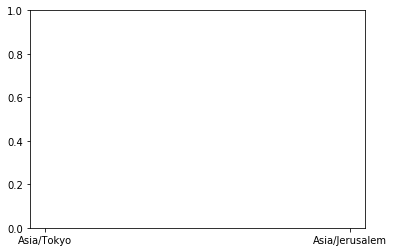

In [400]:

rm.agg(['sum'])